In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# changing matplotlib the default style
matplotlib.style.use('ggplot')
#matplotlib.rcParams["figure.facecolor"] = "white"
#matplotlib.rcParams["savefig.transparent"] = "True"


In [2]:
import pandas as pd


from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *

from scipy import stats
import os
from efficacy_scripts import *




/home/enf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


we are operating on biox3


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from sklearn.preprocessing import scale

In [5]:
from detect_intermediates import *
from interpret_tICs import *

In [6]:
from msmbuilder.utils import verbosedump, verboseload


In [7]:
from b2ar_feature_types import *
#from b2ar_feature_types import *
from get_variable_names import *
from b2ar_tica_config import *
from residue import Residue, Atom

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import scale
from random import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [9]:

ori_feature_name = copy.deepcopy(feature_name)

In [10]:
#schemes = ["closest-heavy", "CA"]
#feature_name = "%s-CA" %ori_feature_name

In [11]:
rho = 0.01
rho_string = "_rho0pt01"
n_clusters = 25
n_samples = 1
lag_time=5
precision = "XP"

In [12]:
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
ori_tica_dir = copy.deepcopy(tica_dir)
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dirdir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A
/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A


In [13]:
tica_object = compat_verboseload(projection_operator_dir)
print(tica_object.timescales_)

[ 729.62933227  289.65120394]


In [14]:
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=5, percentile=95)

Interpreting tIC 1
feature_importances_df.shape
(6, 5)
residue_importances_df.shape
(11, 2)
       feature_name   res_i   res_j  importance           feature
3  Phe108 To Gln170  Phe108  Gln170    0.278917  PHE108 to GLN170
5  Thr274 To Cys327  Thr274  Cys327   -0.216950  THR274 to CYS327
0   Asn51 To Ser319   Asn51  Ser319    0.209493   ASN51 to SER319
4   Asp79 To Tyr326   Asp79  Tyr326    0.195303   ASP79 to TYR326
2   Leu75 To Pro323   Leu75  Pro323   -0.172376   LEU75 to PRO323
1   Asn51 To Gly320   Asn51  Gly320   -0.163539   ASN51 to GLY320
Using dark_background
       residue  importance
Gln170  Gln170    0.278917
Phe108  Phe108    0.278917
Cys327  Cys327   -0.216950
Thr274  Thr274   -0.216950
Ser319  Ser319    0.209493
Tyr326  Tyr326    0.195303
Asp79    Asp79    0.195303
Asn51    Asn51    0.190841
Pro323  Pro323   -0.172376
Leu75    Leu75   -0.172376
Gly320  Gly320   -0.163539
Using dark_background
Interpreting tIC 2
feature_importances_df.shape
(7, 5)
residue_importances_df.

In [15]:
feature_names = compat_verboseload(feature_residues_pkl)

In [16]:
tic_subsampled_features_file = "%s/features_subsampled.pkl" % tica_dir
subsampled_features_dir = os.path.join(tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
important_contact_features_pruned, important_contact_features_indices = find_non_zero_features(important_contact_features[0], feature_names)
#subsample_features(features_dir, important_contact_features_indices, important_contact_features_pruned, tic_subsampled_features_file)

In [17]:
tica_coords = compat_verboseload(projected_features_dir)
pnas_coords = compat_verboseload(pnas_coords_dir)
for pnas_coord in pnas_coords: pnas_coord[:,0]*=7.14
tica_names = ["tIC.%d" %i for i in range(1,n_components+1)]
pnas_names = ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]

In [82]:
from imp import reload
import b2ar_feature_types
reload(b2ar_feature_types)
from b2ar_feature_types import *

top_features = load_file(tic_subsampled_features_file)
top_features = [t*10. for t in top_features]

user_defined_coords = compat_verboseload(user_defined_features_file)
user_defined_names = sorted(feature_name_residues_dict.keys())
user_defined_dfs = [pd.DataFrame(t, columns=user_defined_names) for t in user_defined_coords]

tica_dfs = [pd.DataFrame(t, columns=["tIC.%d" %i for i in range(1,n_components+1)]) for t in tica_coords]

all_feature_dfs = [pd.concat([top_features[i], user_defined_dfs[i], tica_dfs[i]], axis=1) for i in range(0, len(top_features))]


loading /home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/features_subsampled.pkl


In [19]:
import plots
reload(plots)
from plots import *
#plot_histograms(projected_features_dir, analysis_dir, "tICA histogram", titles=["tIC.%d" %i for i in range(1,n_components+1)])

NameError: name 'reload' is not defined

In [24]:
lag_time = 25
msm_model_dir = "%s/msm_lag_time%d.h5" % (tica_dir, lag_time)
#build_msm(clusterer_tICs_1_2_3_filename, lag_time=lag_time, msm_model_dir=msm_model_dir)
msm_object = compat_verboseload(msm_model_dir)
prior_counts = 0.

In [ ]:

#compute_aggregate_scores(docking_multiple_ligands, inverse_agonists = inverse_ligands, summary = aggregate_docking, z_scores_csv = docking_z_scores_csv)
#aggregate_docking_joined_map = convert_csv_to_joined_map(aggregate_docking, aggregate_docking_joined)[0]
#aggregate_docking_means = calc_mean(aggregate_docking_joined_map)
#write_map_to_csv(aggregate_docking_joined, aggregate_docking_means, ["cluster", "mean_aggregate_docking_z_score"])
#r['do.analysis'](tica_dir, analysis_dir, pnas_coords_csv, tica_coords_csv, features_dir, docking_multiple_ligands)
#tics_vs_docking_file = "%s/tICA_vs_docking_carazolol.pdf" % analysis_dir
#plot_tICs_vs_docking(docking_multiple_ligands, tica_coords_csv, tics_vs_docking_file, chosen_ligand="s-carazolol")


In [ ]:
projection_operator_dir

In [ ]:
alt_pp_tica_dir = "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01"
alt_projection_operator_dir = "%s/phi_psi_chi2_allprot_tica_coords.h5" %alt_pp_tica_dir
tic_subsampled_features_file = "%s/features_subsampled.pkl" % alt_pp_tica_dir

alt_important_contact_features = interpret_tIC_components(alt_projection_operator_dir, alt_pp_tica_dir, feature_residues_pkl, n_tica_components=10, percentile=95)

subsampled_features_dir = os.path.join(alt_pp_tica_dir, "subsampled_features")
if not os.path.exists(subsampled_features_dir): os.makedirs(subsampled_features_dir)
alt_important_contact_features_pruned, alt_important_contact_features_indices = find_non_zero_features(alt_important_contact_features[0], feature_names)
if not os.path.exists(tic_subsampled_features_file):
    subsample_features(features_dir, alt_important_contact_features_indices, alt_important_contact_features_pruned, tic_subsampled_features_file)

In [20]:
all_traj_features_np = [f.values for f in all_feature_dfs]
cluster_features_averages = calculate_cluster_averages_per_feature(clusterer, all_traj_features_np)
cluster_features_averages = pd.DataFrame(cluster_features_averages, columns=all_feature_dfs[0].columns, index=["cluster%d" %i for i in range(0,n_clusters)])

NameError: name 'clusterer' is not defined

In [ ]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
feature_name = "Asn148-Leu266_ca_dist"
find_snapshots_within_feature_range(all_feature_dfs, feature_name, [31., 32.], 
                                    get_trajectory_files(traj_dir, traj_ext), analysis_dir,
                                    "%s_31_32" %feature_name, 5, lig_name="BIA", 
                                    structure=None)

In [ ]:
cluster_features_averages.loc[(cluster_features_averages["Asn148-Leu266_ca_dist"] > 35.) & (cluster_features_averages["Asn148-Leu266_ca_dist"] < 40.)]["Asn148-Leu266_ca_dist"]

In [84]:
all_features_onehot, names_onehot = multi_onehot_trajectories([t.values for t in all_feature_dfs], all_feature_dfs[0].columns.values.tolist(), subsample=100)
all_features_onehot = [pd.DataFrame(t, columns=names_onehot) for t in all_features_onehot]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [85]:
[n for n in top_features[0].columns.values.tolist() if "TYR326" in n]

['ASP79 to TYR326']

In [86]:
from imp import reload
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

clusterer, cluster_averages, active_clusters, inactive_clusters, biased_ligands, agonist_ligands, inverse_ligands, all_ligands, c, feature_residues, tica_coords, user_defined_coords, pp_n_components, apriori_dfs, tica_dfs, cluster_pnas_averages, cluster_tica_averages, cluster_tica_pnas, top_features, clusters_map, tica_resampled_file, projected_features, num_trajs, features_eq, all_traj_features, samples_indices_file, samples_dir, samples_tica_avg_df, samples_pnas_avg_df, samples_features_avg_df, samples_normalized_features_avg_df, feature_names, feature_strings, samples_pnas_tica, reference_docking = initialize_analysis(clusterer_dir, user_defined_coords, user_defined_names, biased_agonist_dir, agonist_dir, inverse_agonist_dir, docking_dir, precision, docking_multiple_ligands, aggregate_docking, feature_residues_pkl, n_components, all_feature_dfs,
                        lag_time, n_clusters, projected_features_dir, traj_dir, traj_ext, tica_dir,
                        prior_counts, msm_object, analysis_dir, n_samples)

60556
18142
29602
11692
9005
39876
6361
47042
42043
15117
42889
14554
7263
45472
23113
25186
24422
14847
41130
11930
8705
10899
21655
16763
11754
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/msm_lag-time25_prior-counts0.0_clusters25_resampled_10000.h5"... (<class 'dict'>)
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/tica_msm_lag-time25_clusters25_resampled.h5"... (<class 'numpy.ndarray'>)
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/pnas_resampled.h5"... (<class 'numpy.ndarray'>)
Looking at cluster 0
L

In [87]:
analysis_dir

'/home/enf/b2ar_analysis/sparse-tICA_t5_n_components2all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/analysis_n_clusters25_random'

In [88]:
docking_cluster_averages = c
all_ligands_dir = "/home/enf/b2ar_analysis/all_ligands"
ligands = get_ligands(all_ligands_dir)
apo_populations, df_agg, aggregate_docking_msm, docking_normalized, ddg_scaled, deltas_tica, delta_delta_g, lig_features_eq, new_populations, bi_msm, num_trajs, features, null_features, classes, agonists, antagonists, labels, X, N, C, y = compute_docking_dg(docking_cluster_averages, msm_object, samples_tica_avg_df, samples_pnas_avg_df, samples_normalized_features_avg_df, important_contact_features, traj_dir, traj_ext, tica_dir, ligands, reference_docking, clusters_map, all_features_onehot, analysis_dir)

Index(['TERBSN', 'olodaterol', 'ethylnorepinephrine', 'dichloroisopreterenol',
       'xamoterol', 'skf42469', 'r_isopreterenol', 's-carazolol', 'skf56301',
       'formoterol', 'acebutolol', 'Ici89406', 's-atenolol', 'nebivolol',
       'ta-2005', 'r_epinephrine', 'cgp12177', 'sulfonterol', 'terbutaline',
       'dopamine', 'N-Cyclopentylbutanephrine', 'epinine', 'cicloprolol',
       'procaterol', 'du211117', 'metoprolol', 'zinterol', 'ah3474',
       'orciprenaline', 'Tulobuterol', 'pronethalol', 'alprenalol',
       'propranolol', 'pindolol', 'salmeterol', 'nadolol',
       'isopropylnorsynephrine', 'ritrodine', 'Ici118551', 'practolol',
       'bupranolol', 's-carvedilol', 'hexoprenaline', 'isoetharine_prep',
       'bisoprolol', 'fenoterol', 'sotalol', 'ZINC_results-single', 'ah3021',
       'Ici215001', 'adrenalone', 'du28663', 'Structure2D_CID_3343',
       'salbutamol', '3p0g_lig', 'norepinephrine', 'labetalol', 'cimaterol',
       'broxaterol', 'bevantolol', 'clenbuterol', 'd

In [89]:
lig_continuous_features = msm_reweighted_features_per_ligand(all_feature_dfs, new_populations, bi_msm, 10000, clusters_map, num_trajs, apo_populations, save_dir)

TERBSN
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
olodaterol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
ethylnorepinephrine
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
dichloroisopreterenol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pairs based on equilibrium populations
Rearranged equilibrium sampled frames based on trajectories
xamoterol
Found number to sample per cluster based on equilibrium proporrtions.
Obtained random (trajectory, frame) pair

we are operating on biox3
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)
(50, 6)
(1000, 6)


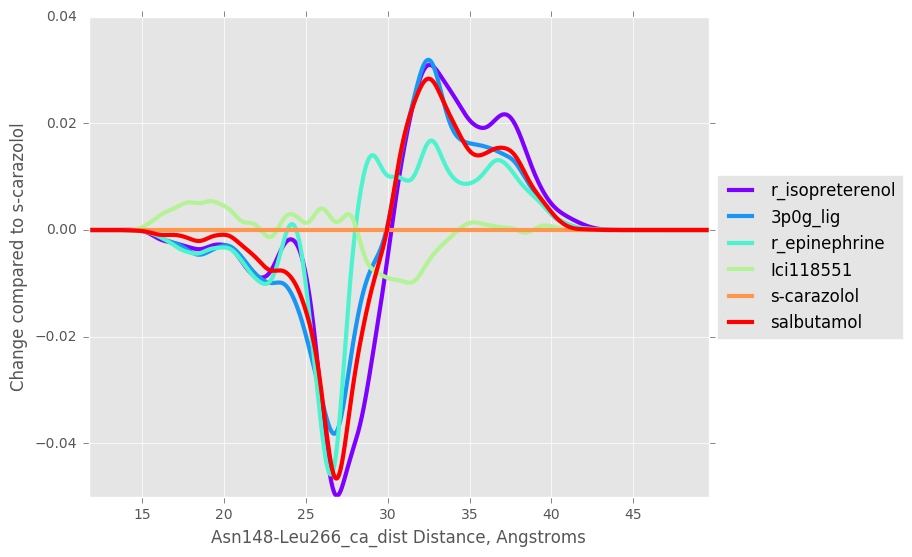

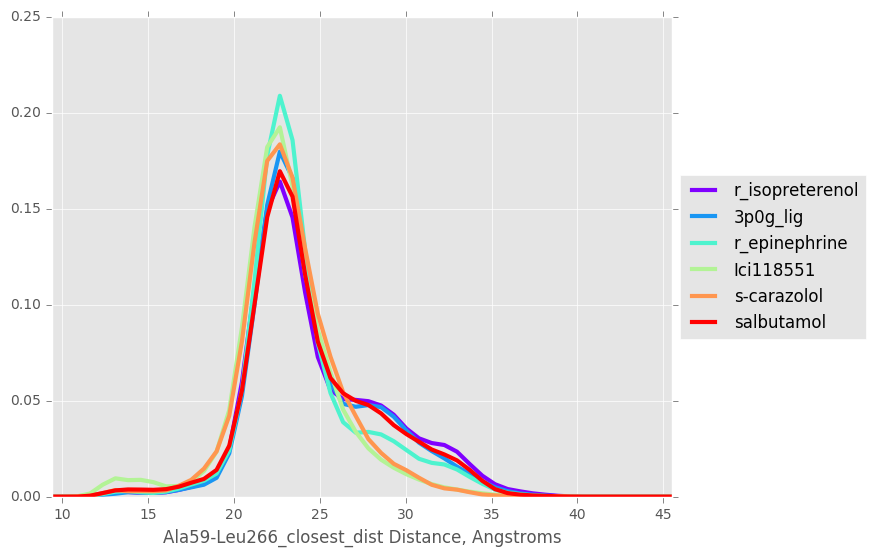

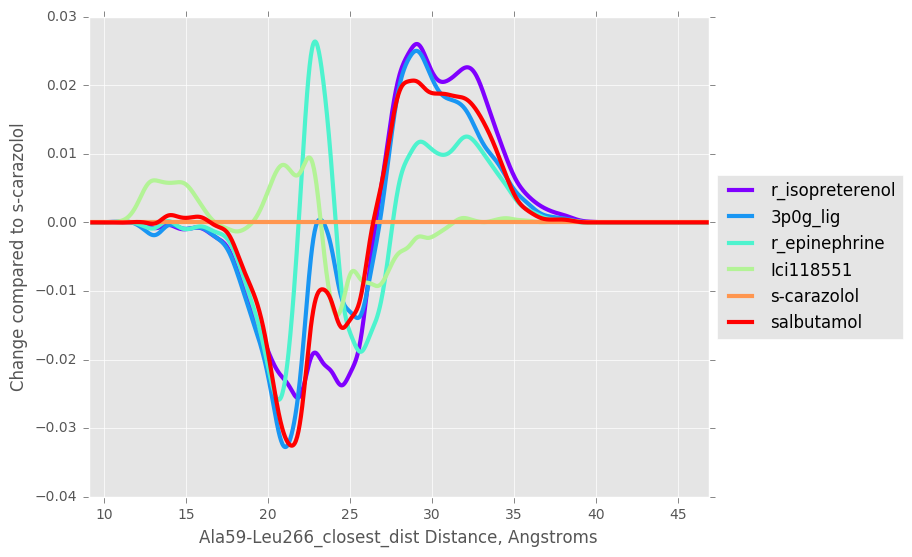

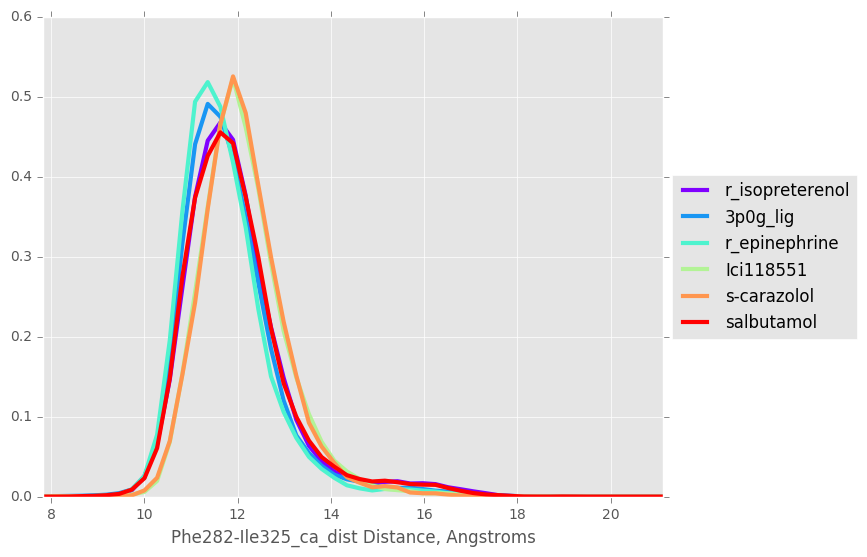

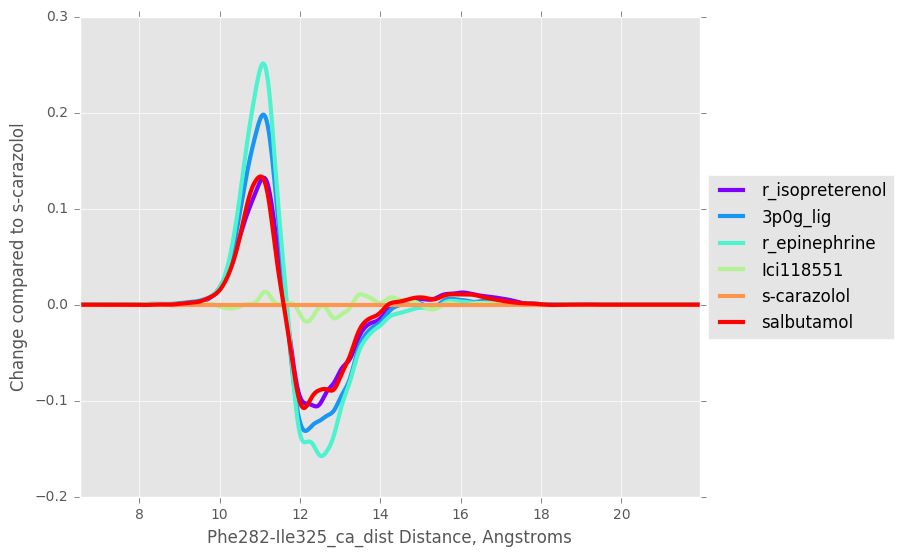

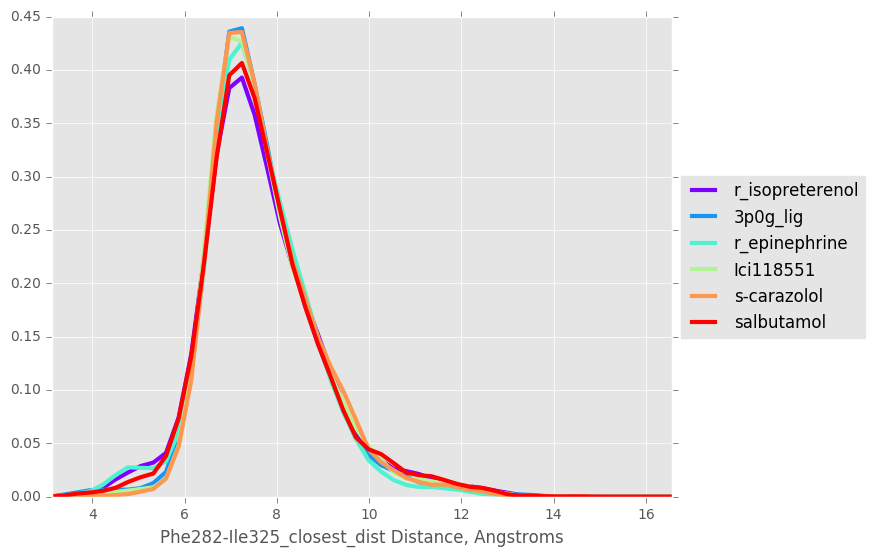

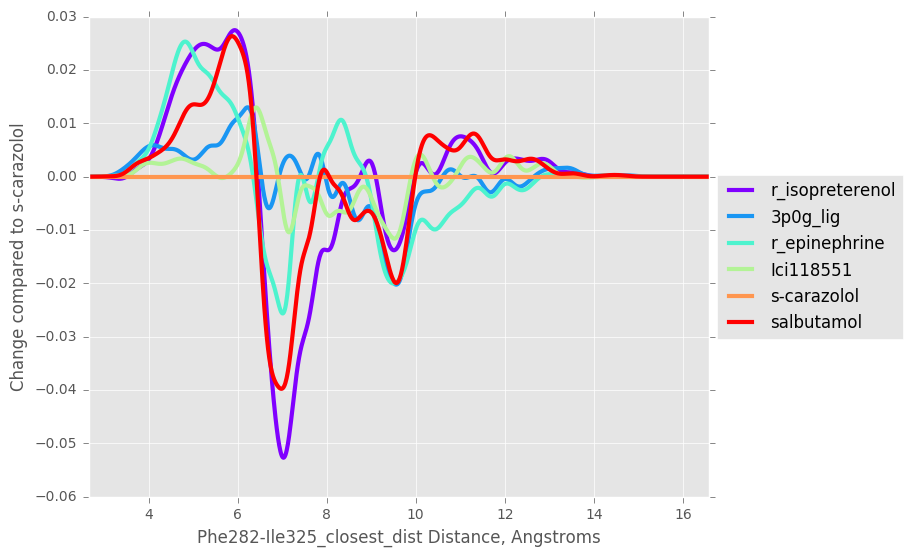

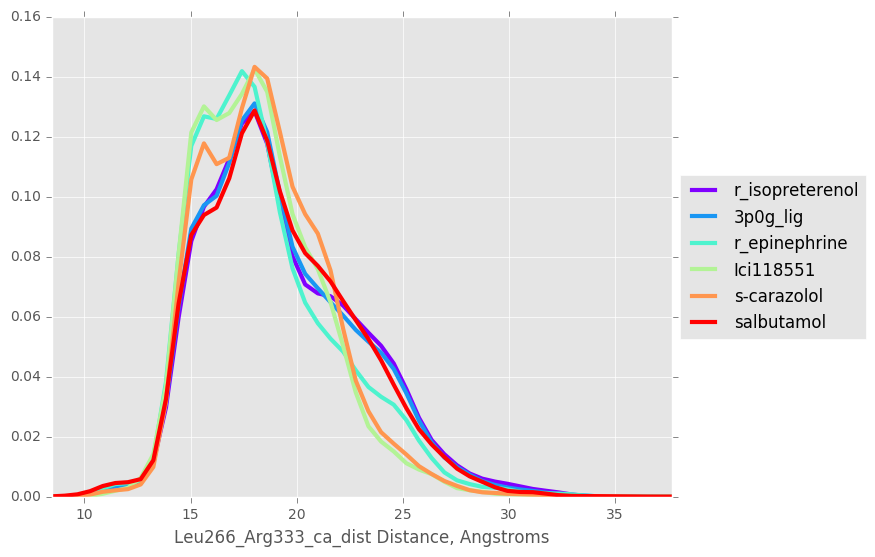

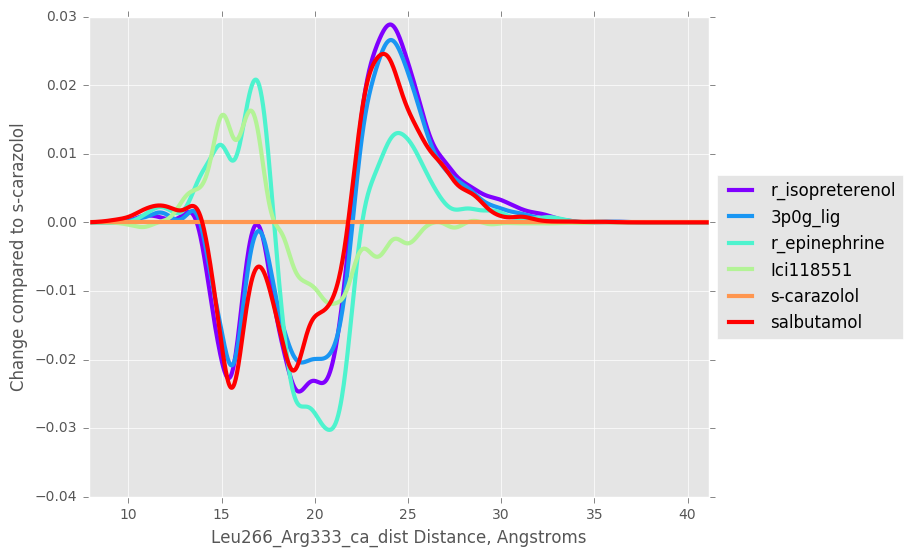

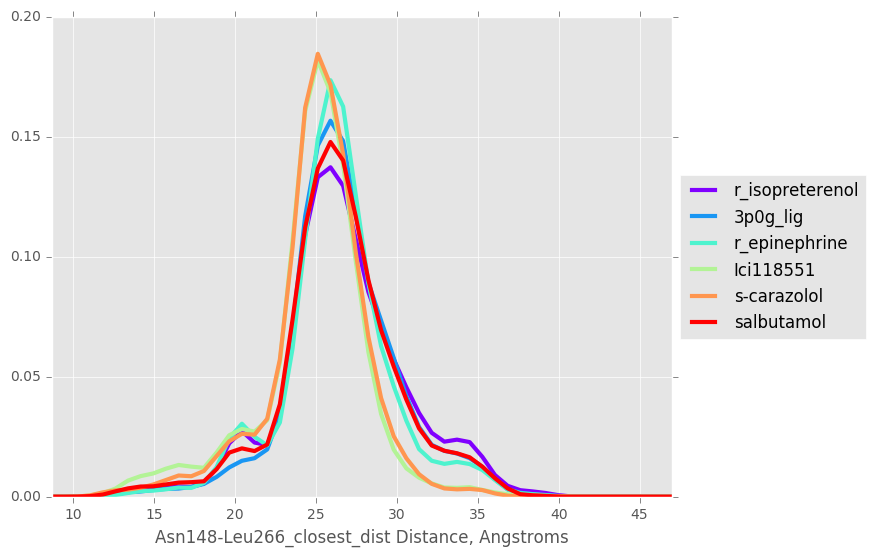

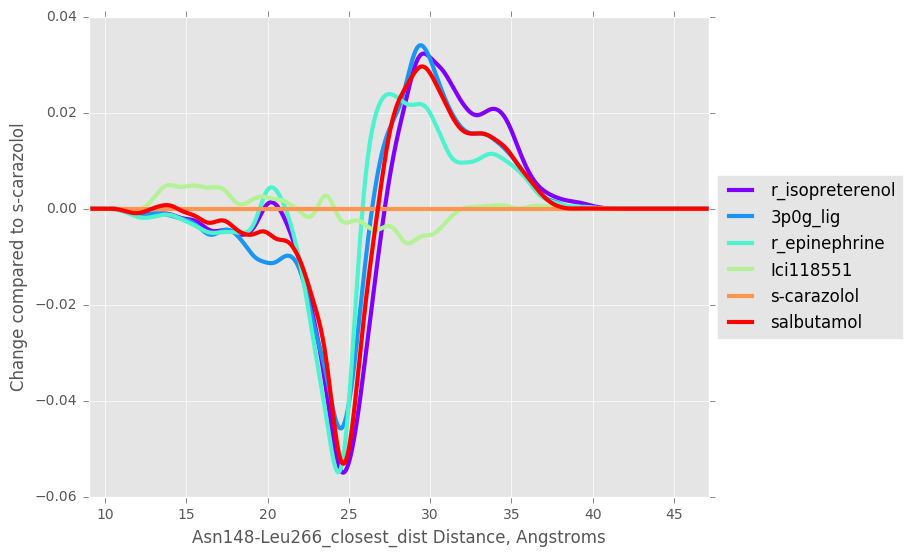

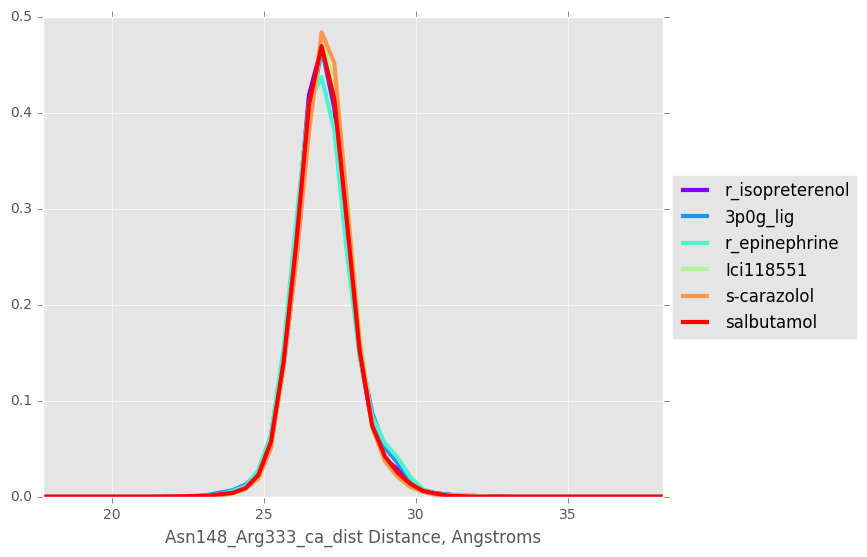

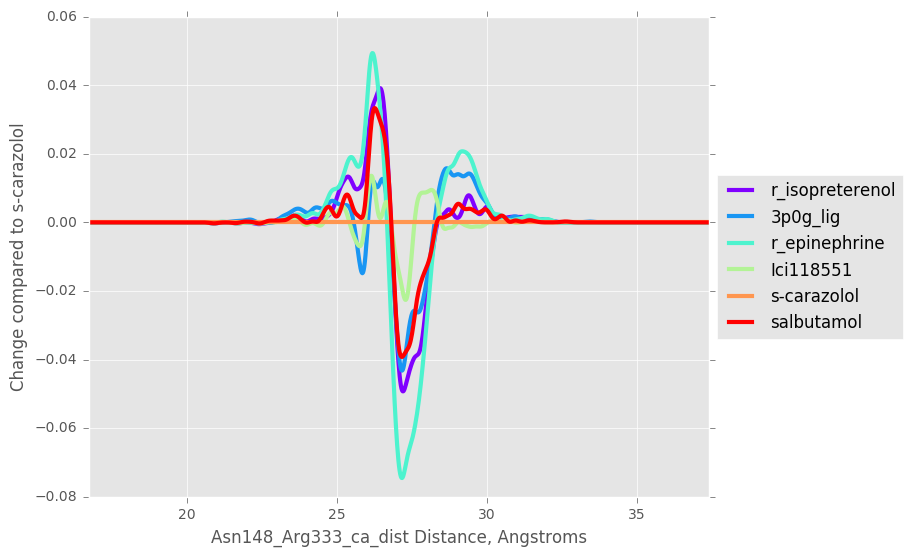

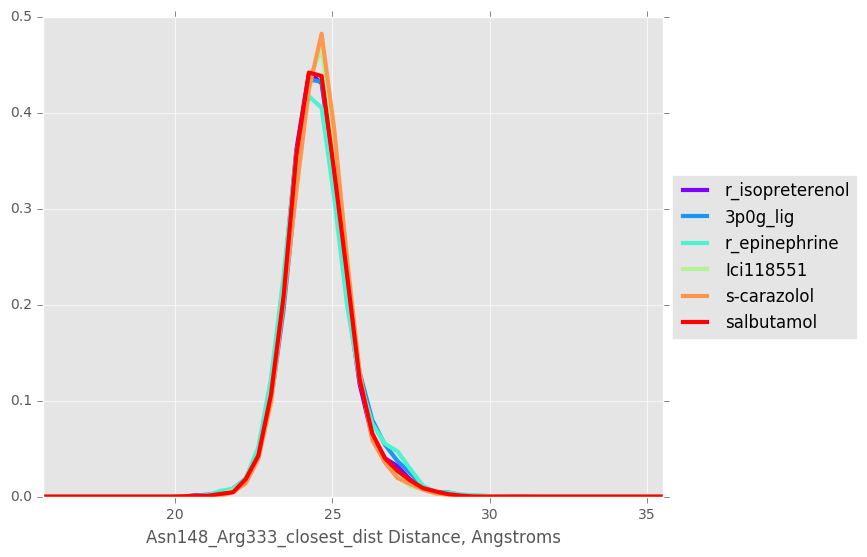

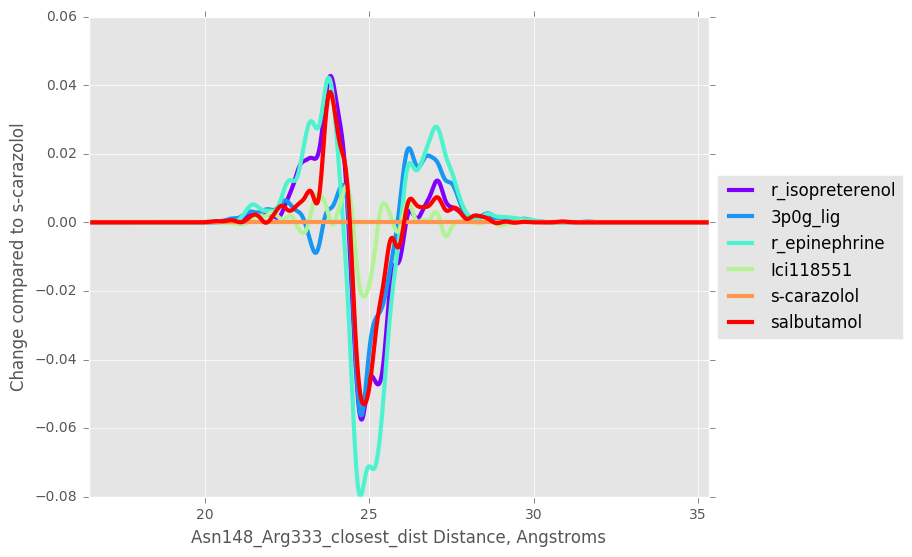

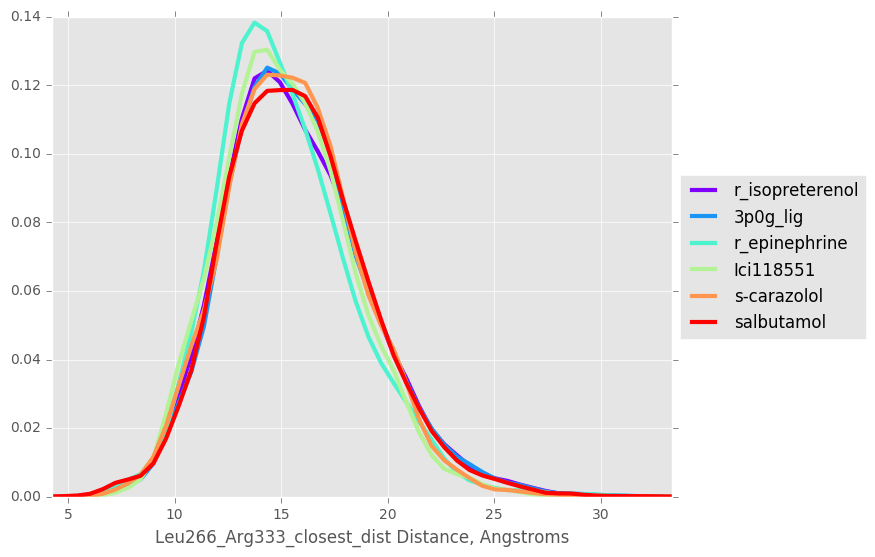

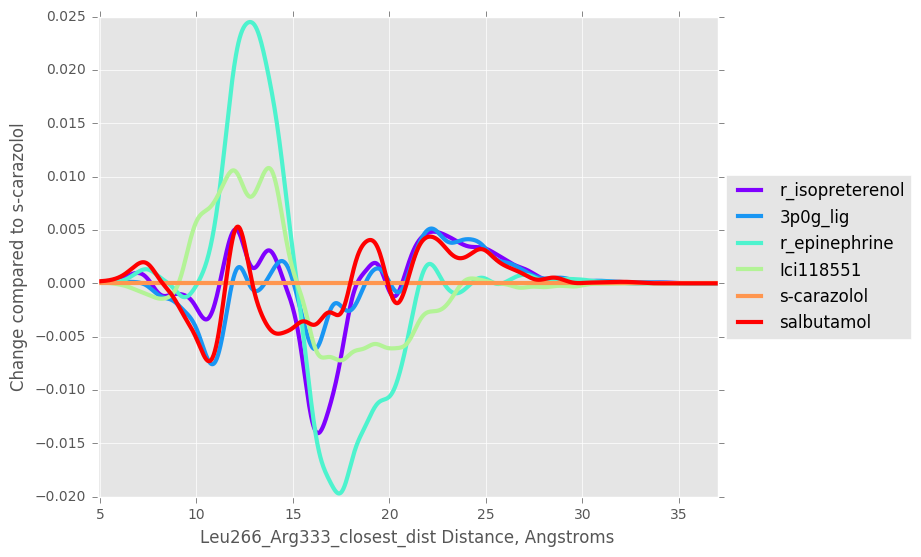

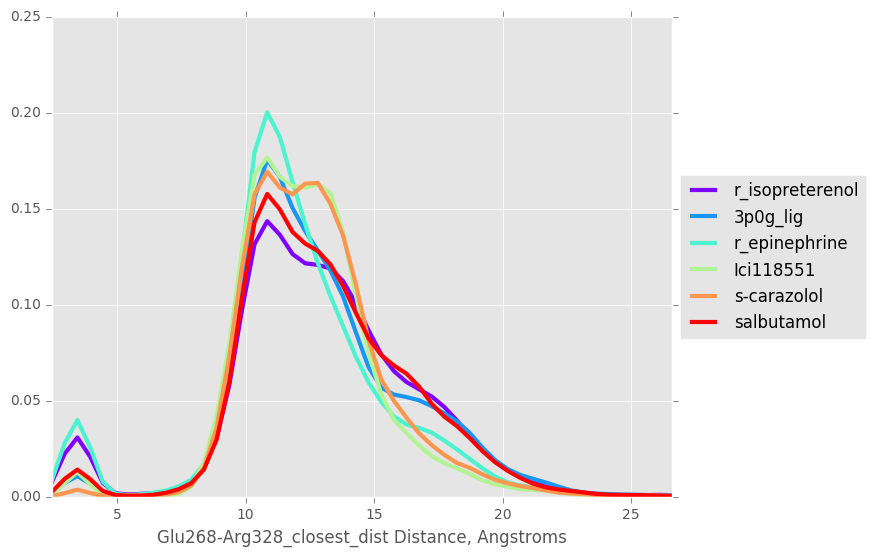

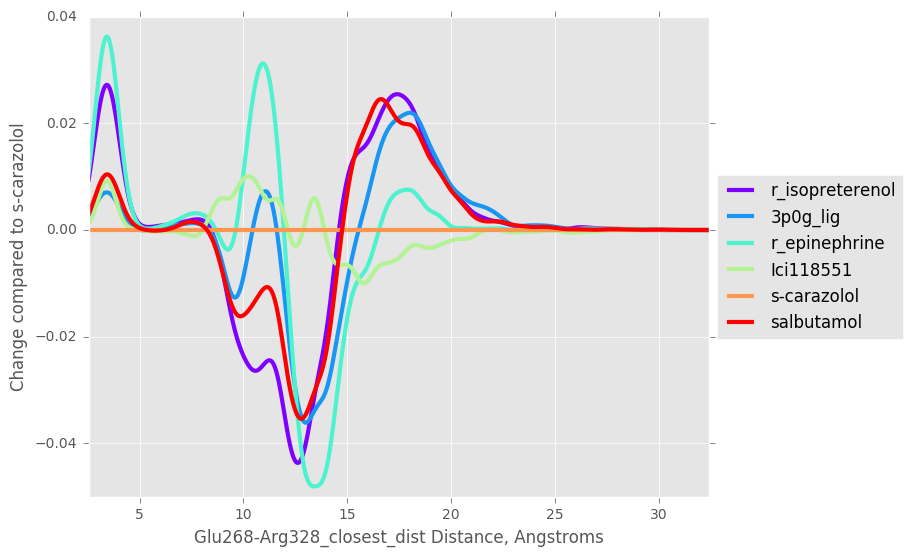

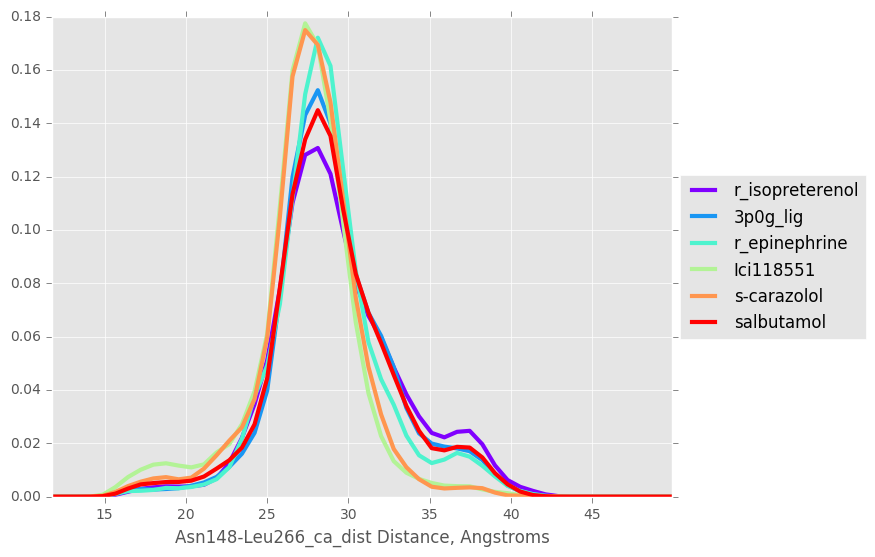

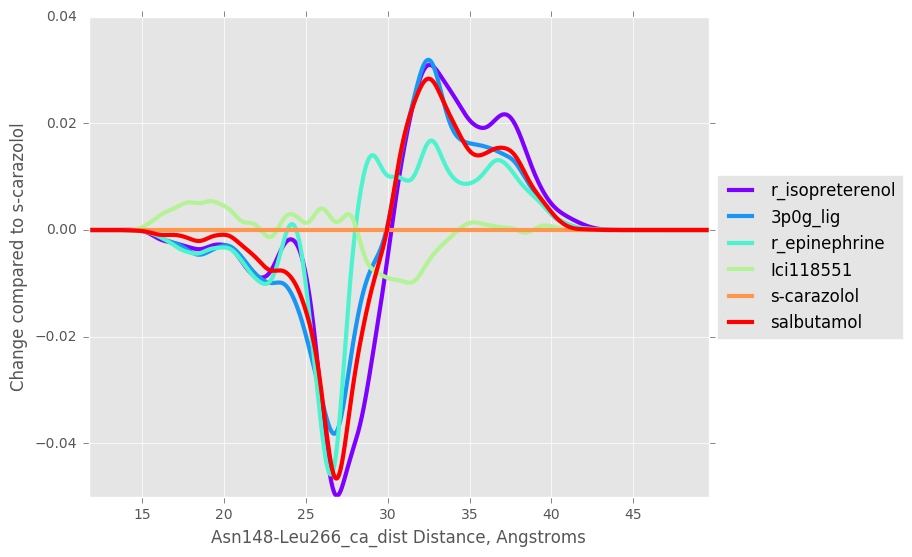

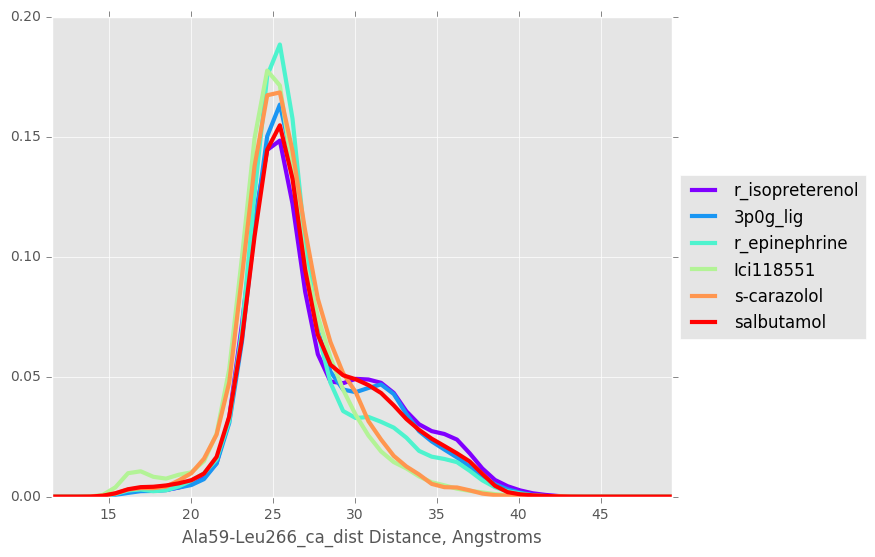

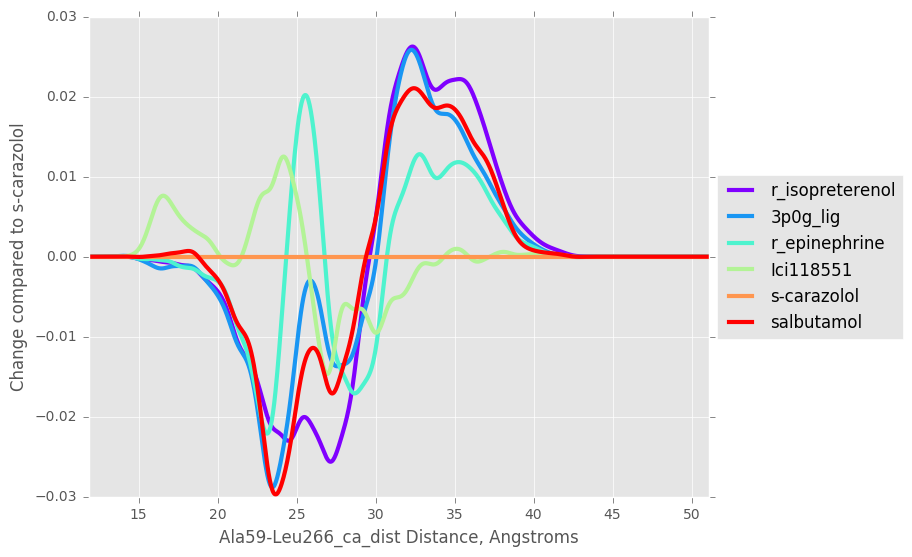

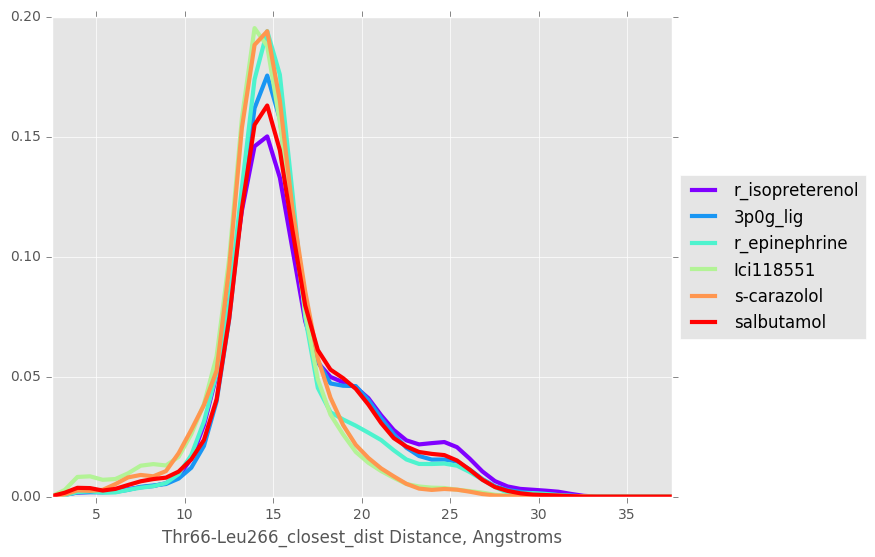

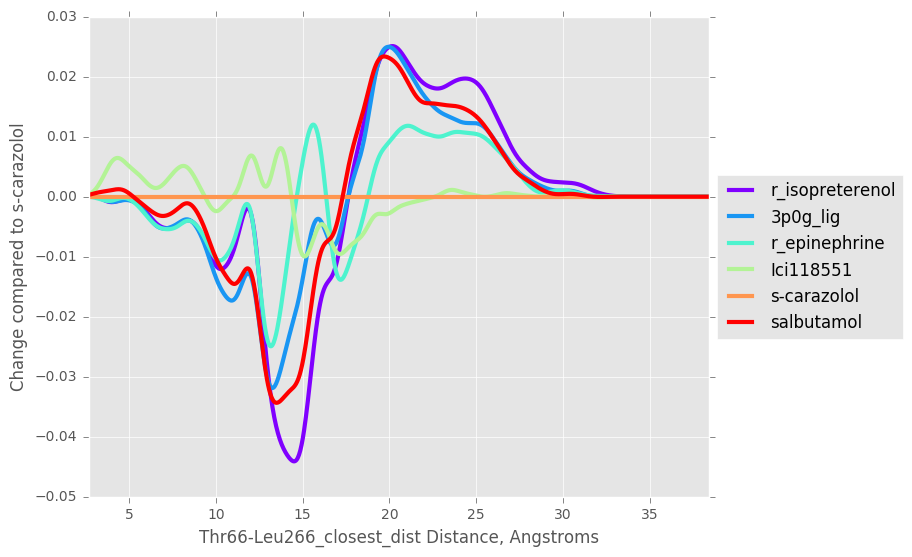

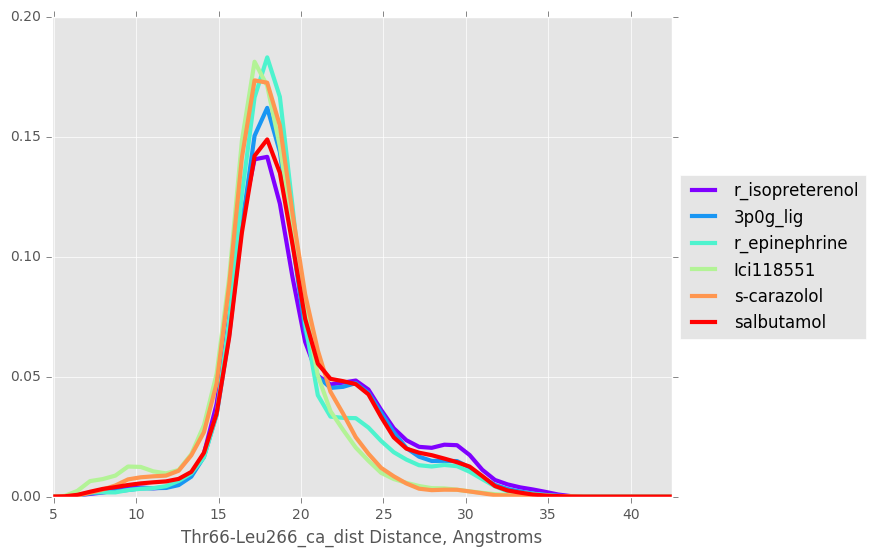

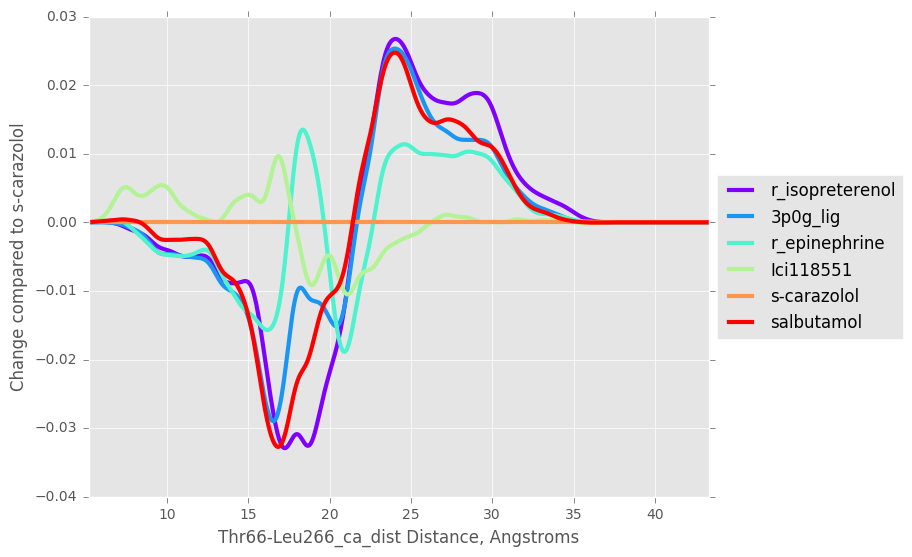

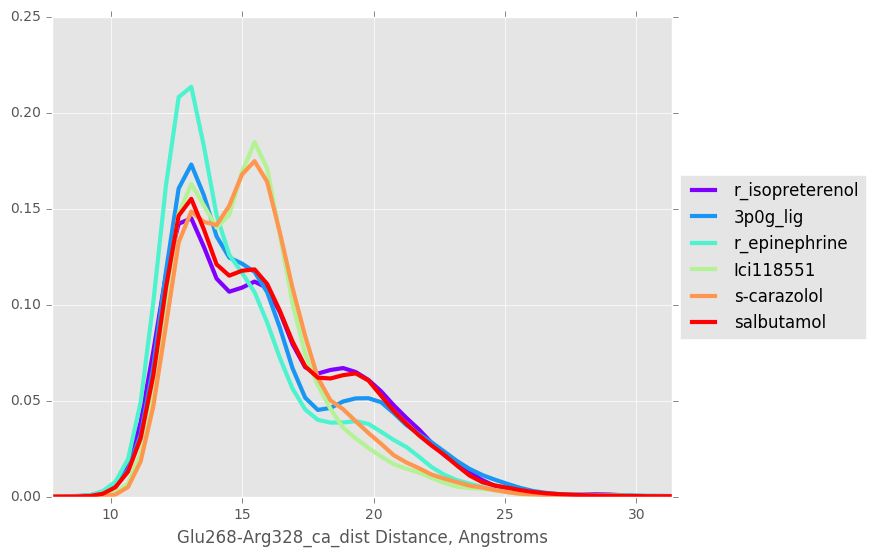

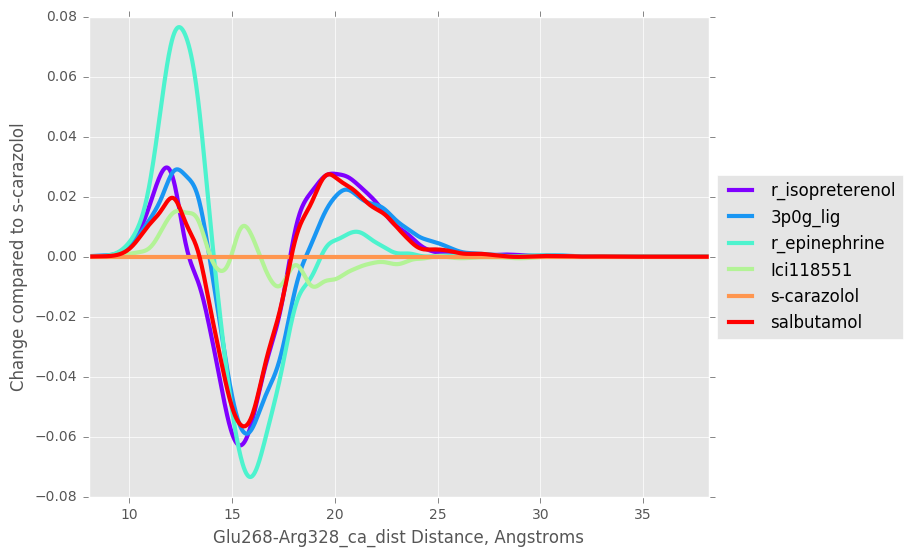

In [90]:
import detect_intermediates
reload(detect_intermediates)
from detect_intermediates import *

import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
#compare_feature_to_apo(lig_continuous_features, ["r_isopreterenol", "nebivolol", "3p0g_lig", "r_epinephrine", "s-carvedilol"], "")
ligands = ["r_isopreterenol", "3p0g_lig", "r_epinephrine", 'Ici118551', "s-carazolol", "salbutamol"]
compare_feature_to_apo(lig_continuous_features, ligands, "s-carazolol", 'Asn148-Leu266_ca_dist')
deer_continuous_names = [n for n in list(feature_name_residues_dict.keys()) if "ca_dist" in n or "closest_dist" in n]
for deer_name in deer_continuous_names:
    save_file = "%s/%s.pdf" %(analysis_dir, deer_name)
    plot_overall_kde(lig_continuous_features, ligands, deer_name, save_file)
    compare_feature_to_apo(lig_continuous_features, ligands, "s-carazolol", deer_name, save_file=save_file)

In [30]:
X_binarized = np.zeros((len(list(lig_features_eq.keys())), lig_features_eq[list(lig_features_eq.keys())[0]].shape[1]))
for i, lig in enumerate(lig_features_eq.keys()):
    print(i)
    x = lig_features_eq[lig]
    X_binarized[i,:] = x.astype(bool).sum(axis=0).values
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


In [31]:
X_onehot_df = pd.DataFrame(X_binarized, index=lig_features_eq.keys(), columns=names_onehot)

In [32]:
[n for n in names_onehot if "TYR326" in n]

['ASP79 to TYR326 < 8.529484',
 '8.529484 < ASP79 to TYR326 < 10.556340',
 'ASP79 to TYR326 > 10.556340']

In [33]:
#X_all_features = np.zeros((len(lig_features_eq.keys()), lig_features_eq[lig_features_eq.keys()[0]].shape[1]))
#for i, lig in enumerate(lig_features_eq.keys()):
#    x = lig_features_eq[lig].mean().values
#    X_all_features[i,:] = x
#X_all_features_df = pd.DataFrame(X_all_features, index=lig_features_eq.keys(), columns=lig_features_eq[lig].columns)
#X_all_features_df = standardize_df(X_all_features_df)

In [ ]:
salt_bridge = []
for ligand in common_ligands:
    salt_bridge.append(lig_features_eq[ligand].loc[lig_features_eq[ligand]["Glu268-Arg328_dist"] < 5.].shape[0])
    

In [ ]:
salt_bridge = []
for ligand in common_ligands:
    salt_bridge.append(lig_features_eq[ligand].loc[lig_features_eq[ligand]["Asn148-Leu266_dist"] > 37.5].shape[0])
pd.DataFrame(salt_bridge, index=common_ligands, columns=["dist"]).sort(columns="dist", inplace=False)

In [ ]:
plt.hist(lig_features_eq["r_isopreterenol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["s-carazolol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["practolol"]["Asn148-Leu266_ca_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["practolol"]["tm6_tm3_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["r_isopreterenol"]["tm6_tm3_dist"].values, bins=50)
plt.show()
plt.hist(lig_features_eq["s-carvedilol"]["tm6_tm3_dist"].values, bins=50)
plt.show()

In [ ]:
plt.scatter(standardize_df(X_onehot_df.loc[common_ligands][X_onehot_df.columns.values[-13]]).values, bret.loc[common_ligands]["B2AR-Gprotein, Mean"])
plt.show()

In [ ]:
df = pd.DataFrame(compute_pearson_matrix(standardize_df(X_onehot_df.loc[common_ligands].transpose()).values.T,bret["B2AR-Gprotein, Mean"].subtract(bret["B2AR-Arrestin, Mean"]).loc[common_agonists].values.reshape((-1,1))), index=X_onehot_df.columns, columns=["correlation"]).sort("correlation", inplace=False)
print(df)

In [ ]:
list(feature_name_residues_dict.keys())

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
cluster_pnas_averages

In [ ]:
samples_features_avg_df

In [91]:
bret = pd.read_excel("/home/enf/b2ar_analysis/bret_bias_study2.xlsx", header=0).dropna().set_index("EvanName")
#bret = pd.read_csv("/home/enf/b2ar_analysis/bias_analysis/bret_bias_study.csv", header=0).dropna().set_index("EvanName")
common_ligands = [n for n in bret.index.values if n in delta_delta_g.columns.values]
bret["B2AR-Arrestin, Mean"].sort(inplace=False)#.subtract(bret["B2AR-Arrestin, Mean"])


EvanName
Ici215001                 0.00
propranolol               0.00
pronethalol               0.00
practolol                 0.00
pindolol                  0.00
nor-metanephrine          0.00
labetalol                 0.00
Ici89406                  0.00
timolol                   0.00
Ici118551                 0.00
dichloroisopreterenol     0.00
xamoterol                 0.00
s-carvedilol              0.00
alprenalol                0.00
cgp12177                  0.00
s-atenolol                0.00
ah3474                    0.00
bisoprolol                0.00
sulfonterol               0.01
dobutamine                0.02
TERBSN                    0.02
MAPE                      0.02
isopropylnorsynephrine    0.02
Tulobuterol               0.03
dopamine                  0.04
ritrodine                 0.04
clenproperol              0.10
clenbuterol               0.13
salbutamol                0.29
ah3021                    0.31
orciprenaline             0.41
terbutaline               0.47

In [92]:
bret

Number  \
EvanName                         
adrenalone                   1   
ah3021                       2   
ah3474                       3   
salbutamol                   4   
alprenalol                   5   
s-atenolol                   6   
bisoprolol                   7   
Tulobuterol                  9   
s-carvedilol                10   
cgp12177                    11   
cimaterol                   12   
clenbuterol                 13   
dichloroisopreterenol       14   
dobutamine                  15   
dopamine                    16   
du211117                    17   
du28663                     18   
r_epinephrine               19   
fenoterol                   20   
hexoprenaline               21   
Ici118551                   22   
Ici215001                   23   
Ici89406                    24   
isopropylnorsynephrine      25   
r_isopreterenol             26   
labetalol                   27   
MAPE                        28   
clenproperol                29   
epinine                     30   
norepinephrine              31   
nor-metanephrine            32   
orciprenaline               33   
pindolol                    34   
practolol                   35   
pronethalol                 36   
propranolol                 37   
ritrodine                   38   
skf42469                    39   
sulfonterol                 41   
terbutaline                 42   
TERBSN                      43   
timolol                     44   
xamoterol                   45   

                                                                     Name  \
EvanName                                                                    
adrenalone                                                     Adrenalone   
ah3021                                                            AH 3021   
ah3474                                                           AH 3474A   
salbutamol                                         Albuterol (Salbutamol)   
alprenalol                                                     Alprenolol   
s-atenolol                                                       Atenolol   
bisoprolol                                                     Bisoprolol   
Tulobuterol                                             C78 (Tulobuterol)   
s-carvedilol                                                   Carvedilol   
cgp12177                                                        CGP 12177   
cimaterol                                                       Cimeterol   
clenbuterol                                                   Clenbuterol   
dichloroisopreterenol                               Dichloroisoproterenol   
dobutamine                                                     Dobutamine   
dopamine                                                         Dopamine   
du211117                                                         Du 21117   
du28663                                                          Du 28663   
r_epinephrine                                                 Epinephrine   
fenoterol                                                       Fenoterol   
hexoprenaline                                               Hexoprenaline   
Ici118551                                                      ICI 118551   
Ici215001                                                      ICI 215001   
Ici89406                                                        ICI 89406   
isopropylnorsynephrine                             Isopropylnorsynephrine   
r_isopreterenol                                             Isoproterenol   
labetalol                                                       Labetalol   
MAPE                    MAPE [2-(methylamino)-1-\nphenylethanol]\nhalo...   
clenproperol                                       NAB 277 (clenproperol)   
epinine                                       N-methyl-dopamine (epinine)   
norepinephrine                                             Norepinephrine   
nor-metanephrine             

In [107]:
from sklearn.preprocessing import binarize
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
y_ori = y_arr - y_gpr
#y_ori = y_arr
#y = y_arr
#y = multi_binarizer(y_gpr, [0.2, 0.8])
y = multi_binarizer(y_ori, [-0.2])
print(y)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C*-1.0])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C*-1.0])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C*-1.0])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C*-1.0])
deer_names = [n for n in X_onehot_df.columns.values.tolist() if "_ca_dist" in n or "closest_dist" in n]

all_features_df = pd.concat([ddg_scaled.transpose()[top_clusters], null_features.multiply(-1.0), X_onehot_df[deer_names].multiply(-1.0)], axis=1).dropna().loc[common_agonists]
all_features = all_features_df.values
features = [C*-1.0, X_scaled, all_features]
features_y = [C*-1.0, X_scaled]
feature_names = ["Crystal Structures", "Docking ddG Scaled", "Docking ddG and Observables"]




[[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


In [105]:
n_trials=100
save_file = "%s/a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv.pkl" %analysis_dir
if 1 == 1:
#if not os.path.exists(save_file):
    a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv= do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False, model="logistic_cv")
    with open(save_file, "wb") as f:
        pickle.dump(a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv, f)
else:
    a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv = compat_verboseload(save_file)

Fitting models over all data...
Fitting models over split train data...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


[ 0.25   0.875  0.75 ]


ValueError: list.remove(x): x not in list

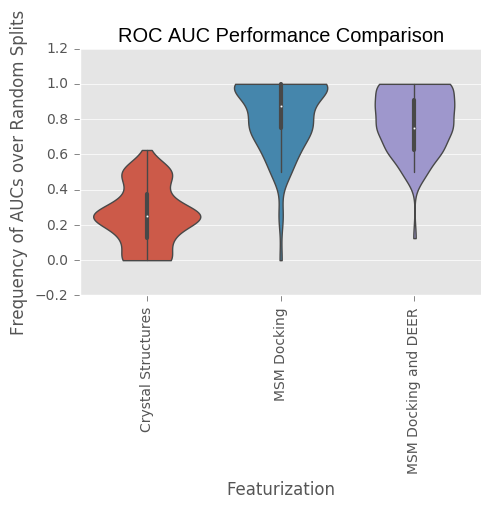

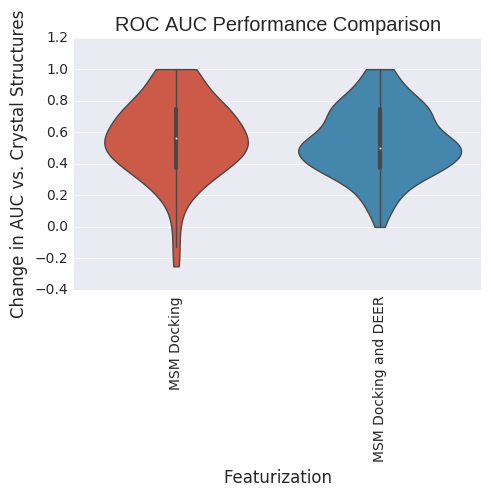

(1, 3)
(1, 3)


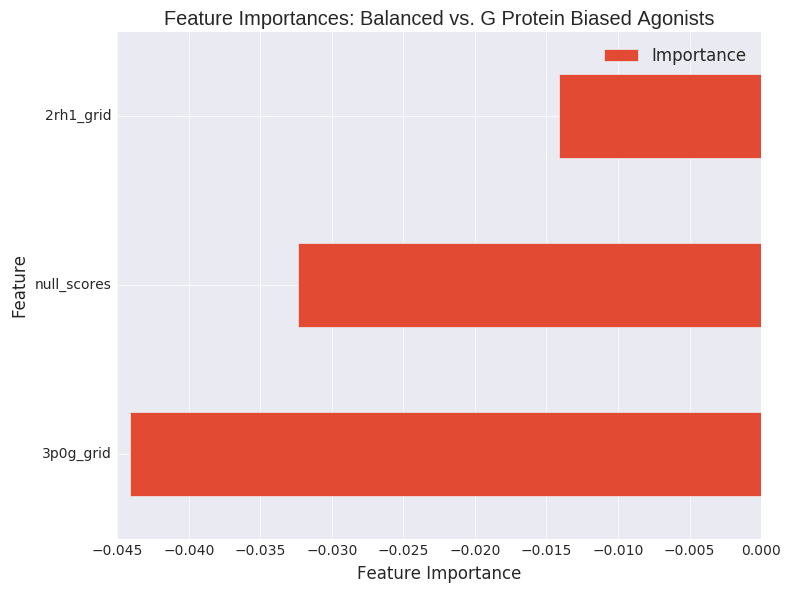

(1, 28)
(1, 28)


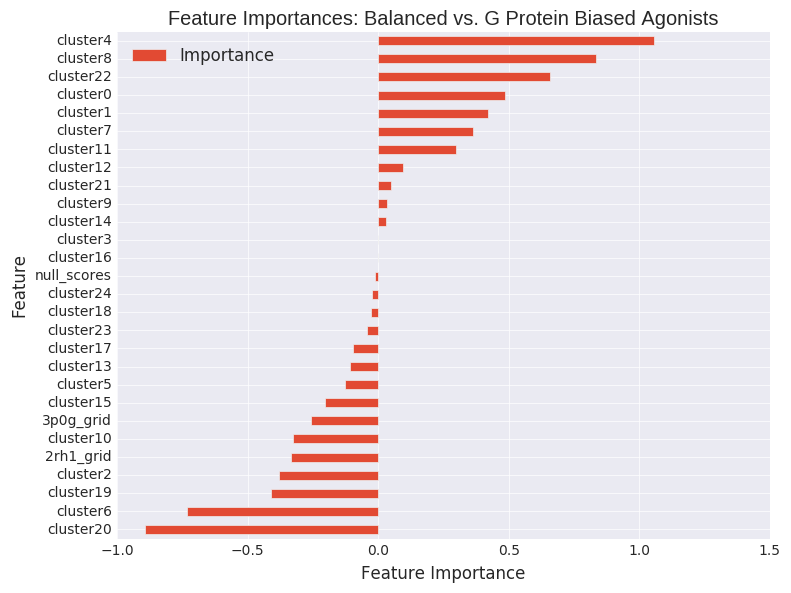

(1, 45)
(1, 45)


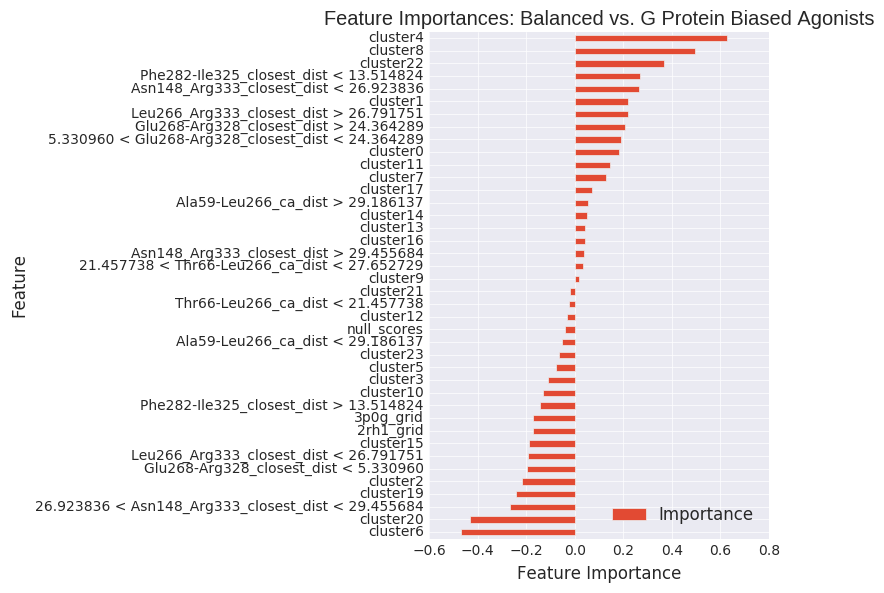

In [106]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

print(np.median(a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv["test_roc_aucs"], axis=0))

all_feature_names = [null_features.columns.values.tolist(), ddg_scaled.index.values.tolist() + null_features.columns.values.tolist(), all_features_df.columns.values.tolist()]
analyze_multiclass_experiment(a_vs_g_results_t100_single0pt2_split0pt8_logistic_cv, 
                              ["Crystal Structures", "MSM Docking", "MSM Docking and DEER"],
                              all_feature_names, common_agonists, analysis_dir,
                              ["Balanced vs. G Protein Biased Agonists", "Balanced vs. G Protein Biased Agonists"], X_scaled, 
                              exp_title="Arrestin vs. G Protein Two Class", coef_name="Logistic Coefficient")



In [103]:
y.shape

(43, 1)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.,    4.,    0.,    2.,
           1.,    2.,    4.,    1.,    5.,    9.,    8.,    4.,   15.,
           9.,   17.,   23.,   32.,   46.,   59.,   84.,   97.,  153.,
         152.,  213.,  276.,  306.,  383.,  383.,  465.,  498.,  523.,
         540.,  543.,  549.,  598.,  475.,  436.,  412.,  367.,  361.,
         299.,  228.,  211.,  160.,  133.,  115.,   93.,   82.,   83.,
          58.,   72.,   53.,   50.,   42.,   45.,   39.,   33.,   24.,
          26.,   20.,   11.,   24.,    5.,    7.,    5.,    5.,    4.,
           4.,    3.,    2.,    1.,    0.,    1.,    0.,    0.,    1.,    1.]),
 array([ 17.60079384,  17.72452738,  17.84826092,  17.97199446,
         18.095728  ,  18.21946154,  18.34319508,  18.46692862,
         18.59066216,  18.71439569,  18.83812923,  18.96186277,
         19.085596

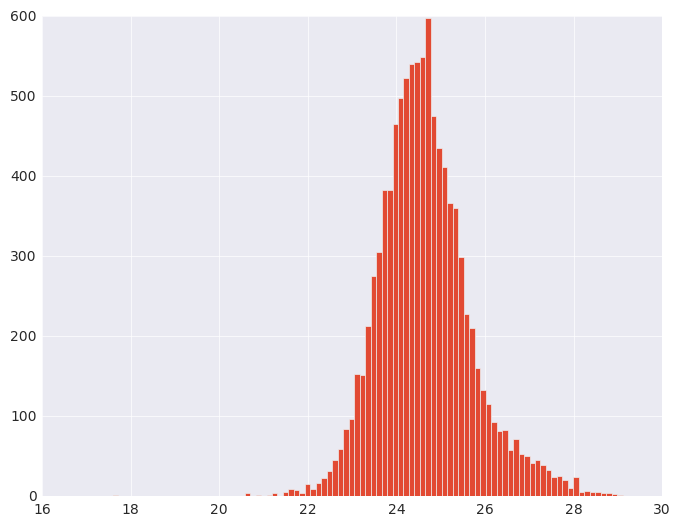

In [39]:
plt.hist(lig_continuous_features["3p0g_lig"]['Asn148_Arg333_closest_dist'], bins=100)

In [ ]:
analysis_dir = "%s_%dsamples" %(analysis_dir, n_samples)
print(analysis_dir)

In [ ]:
if not os.path.exists(analysis_dir):
    os.makedirs(analysis_dir)

In [ ]:
n_trials = 1000

y = multi_binarizer(y_gpr, [0.33, 0.66])
gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.33, 0.66])
arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
    
    
y = multi_binarizer(y_gpr, [0.2, 0.8])
gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.2, 0.8])
arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))   

y = multi_binarizer(y_gpr, [0.5])
gprot_results_t1000_single0pt5_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_single0pt5_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_single0pt5_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.5])
arr_results_t1000_single0pt5_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_single0pt5_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_single0pt5_split0pt6_logistic_2f, f)
    
print(np.median(np.array(gprot_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))

    
y = multi_binarizer(y_gpr, [0.2])
gprot_results_t1000_single0pt2_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/gprot_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_single0pt2_split0pt6_logistic_2f, f)

y = multi_binarizer(y_arr, [0.2])
arr_results_t1000_single0pt2_split0pt6_logistic_2f = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False, model="logistic_cv")
with open("%s/arr_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_single0pt2_split0pt6_logistic_2f, f)

print(np.median(np.array(gprot_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))

        
gprot_results_t1000_0pt8_ridge = do_regression_experiment(features, y_gpr, feature_names, n_trials, .8, regularize=False, model="RidgeCV")
with open("%s/gprot_results_t1000_0pt8_ridge.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_0pt8_ridge, f)

arr_results_t1000_0pt8_ridge = do_regression_experiment(features, y_arr, feature_names, n_trials, .8, regularize=False, model="RidgeCV")
with open("%s/arr_results_t1000_0pt8_ridge.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_0pt8_ridge, f)

print(np.median(np.array(gprot_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print(np.median(np.array(arr_results_t1000_0pt8_ridge["test_r2s"]), axis=0))





In [ ]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
n_trials = 1000

y = multi_binarizer(y_gpr, [0.2, 0.8])
gprot_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=True, model="logistic_cv")
with open("%s/gprot_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs, f)

y = multi_binarizer(y_arr, [0.2, 0.8])
arr_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=True, model="logistic_cv")
with open("%s/arr_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_multi0pt2_split0pt8_logistic_cv_2f_obs, f)


y = multi_binarizer(y_gpr, [0.2])
gprot_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=True, model="logistic_cv")
with open("%s/gprot_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(gprot_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs, f)

y = multi_binarizer(y_arr, [0.2])
arr_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=True, model="logistic_cv")
with open("%s/arr_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs, f)



In [ ]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
n_trials = 100
y = multi_binarizer(y_arr, [0.2, 0.8])
arr_splits_0pt2_0pt8_model_logistic_cv_regularized_dict = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False, model="logistic_cv")

arr_splits_0pt2_0pt8_model_logistic_cv_regularized = arr_splits_0pt2_0pt8_model_logistic_cv_regularized_dict[feature_names[1]][1]
save_file = "%s/arr_splits_0pt2_0pt8_model_logistic_cv_regularized.pkl" %analysis_dir
with open(save_file, "wb") as f:
    pickle.dump(arr_splits_0pt2_0pt8_model_logistic_cv_regularized, f, protocol=2)


In [ ]:
np.median(arr_splits_0pt2_0pt8_model_logistic_cv_regularized_dict["test_roc_aucs"], axis=0)

In [ ]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *

n_trials = 1000
y = multi_binarizer(y_arr, [0.2, 0.8])
save_file = "%s/arr_splits_0pt2_0pt8_model_logistic_cv_deer_trials%d.pkl" %(analysis_dir, n_trials)


arr_splits_0pt2_0pt8_model_logistic_cv_deer = generate_or_load_model(features, y, feature_names, n_trials, 0.8, False, "logistic_cv", save_file, redo=True)

Fitting models over all data...
Fitting models over split train data...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
25

In [ ]:
n_trials = 1000
y = multi_binarizer(y_gpr, [0.2, 0.8])
save_file = "%s/gpr_splits_0pt2_0pt8_model_logistic_cv_deer_trials%d.pkl" %(analysis_dir, n_trials)


gpr_splits_0pt2_0pt8_model_logistic_cv_deer = generate_or_load_model(features, y, feature_names, n_trials, 0.8, False, "logistic_cv", save_file, redo=True)

In [111]:
print("hi")

hi


ValueError: list.remove(x): x not in list

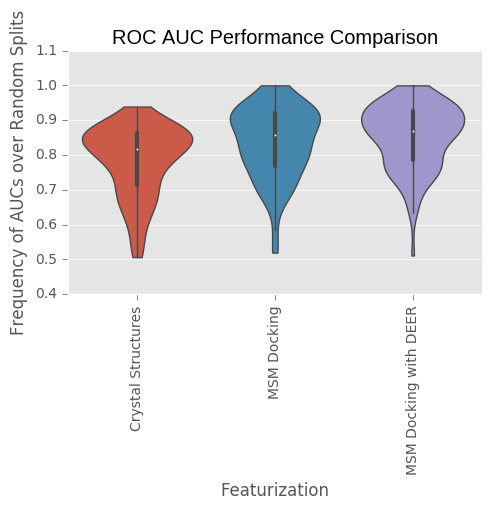

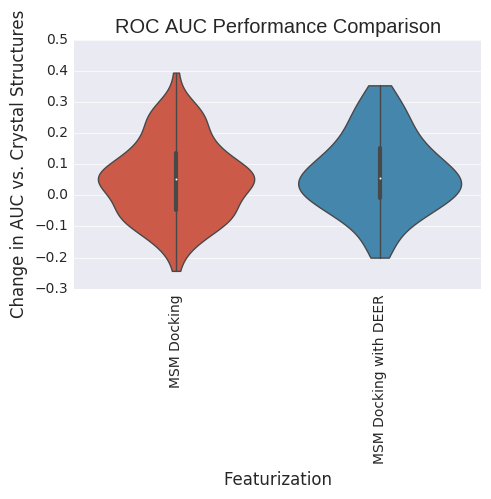

(3, 3)
(3, 3)


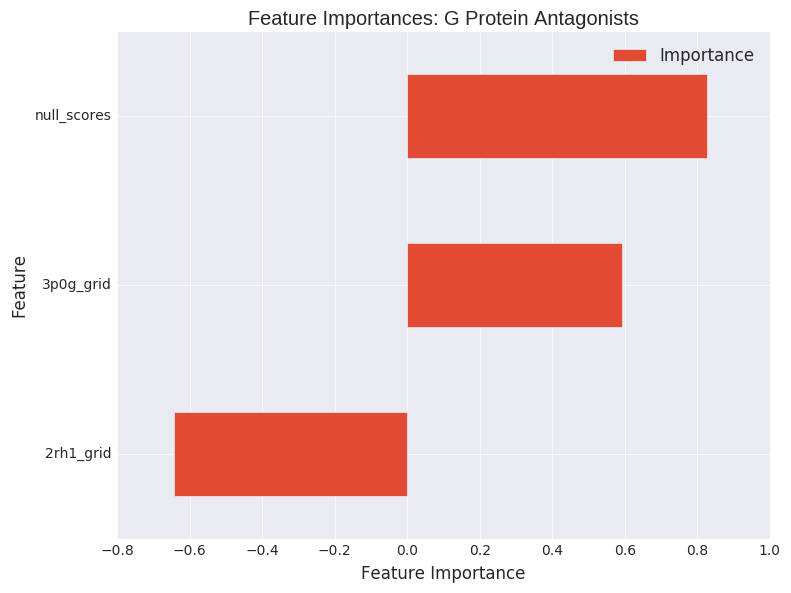

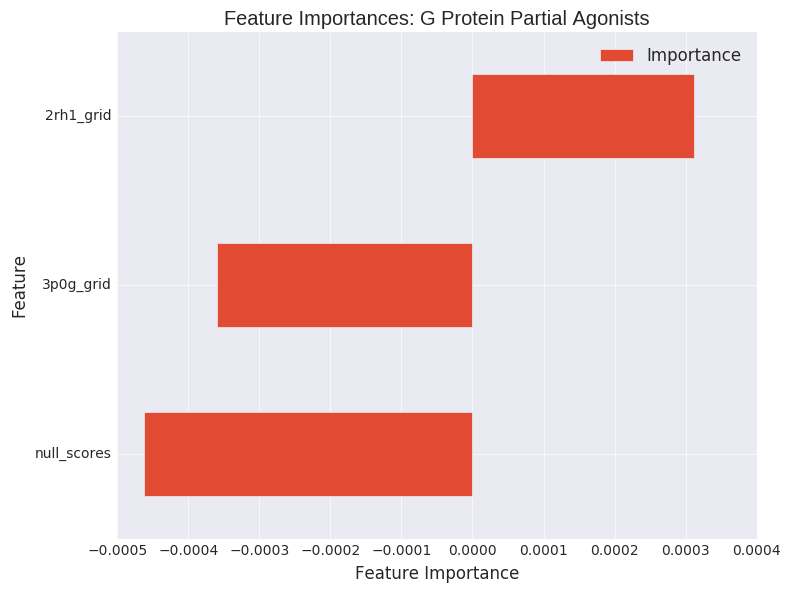

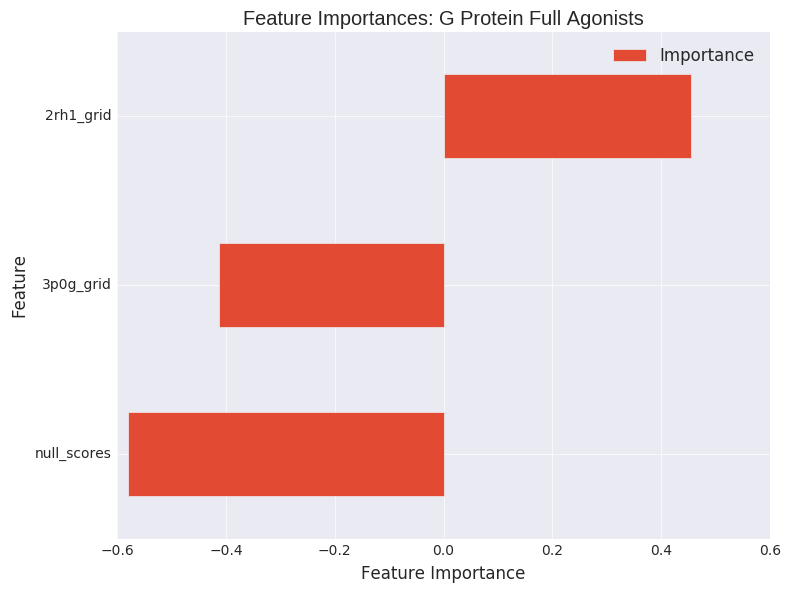

(3, 28)
(3, 28)


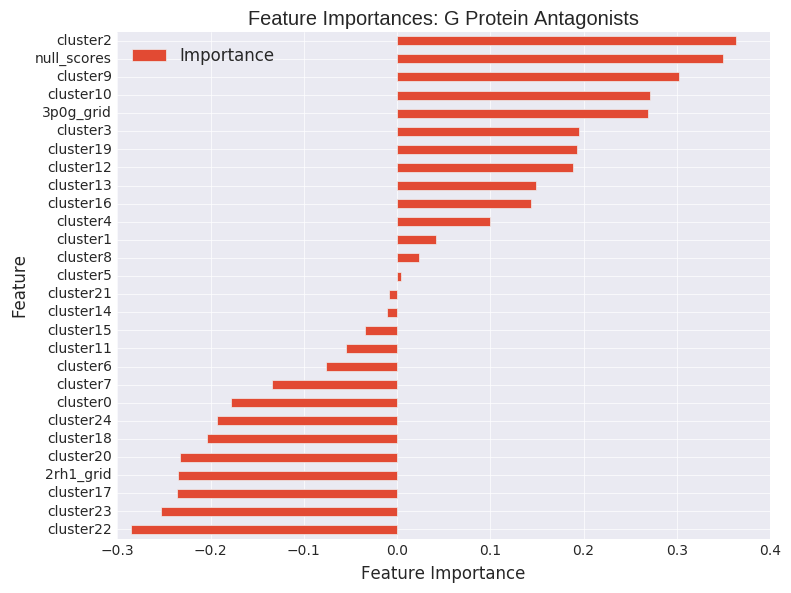

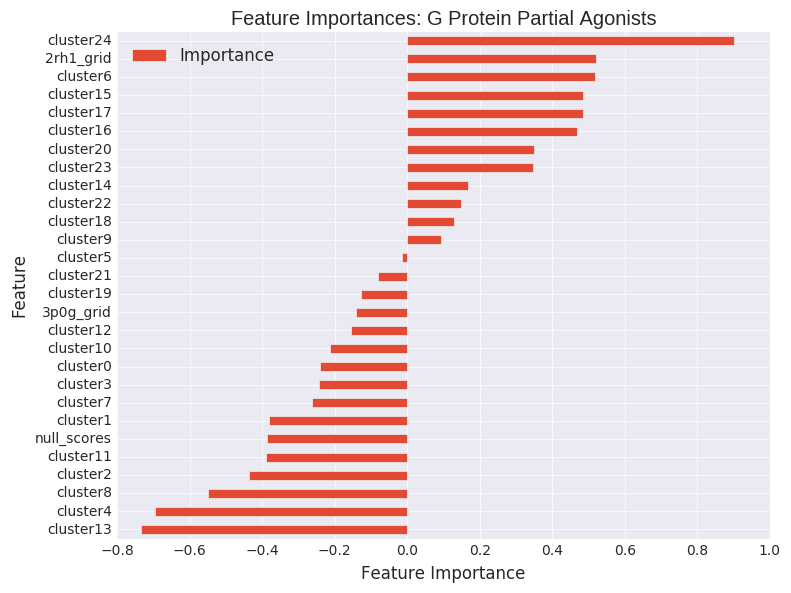

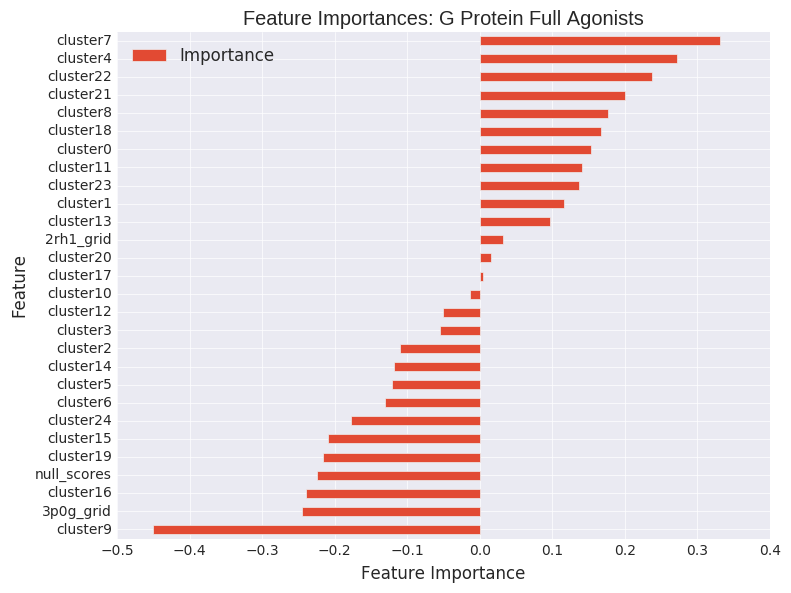

(3, 45)
(3, 45)


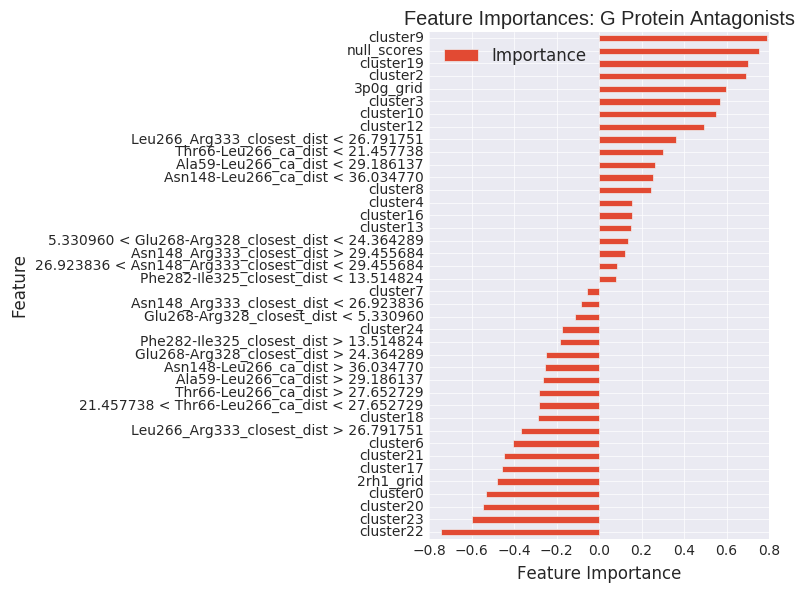

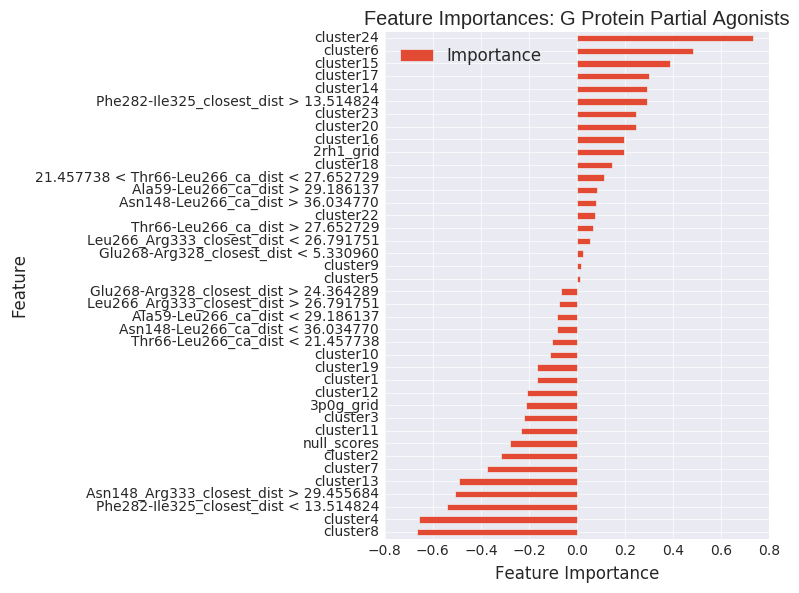

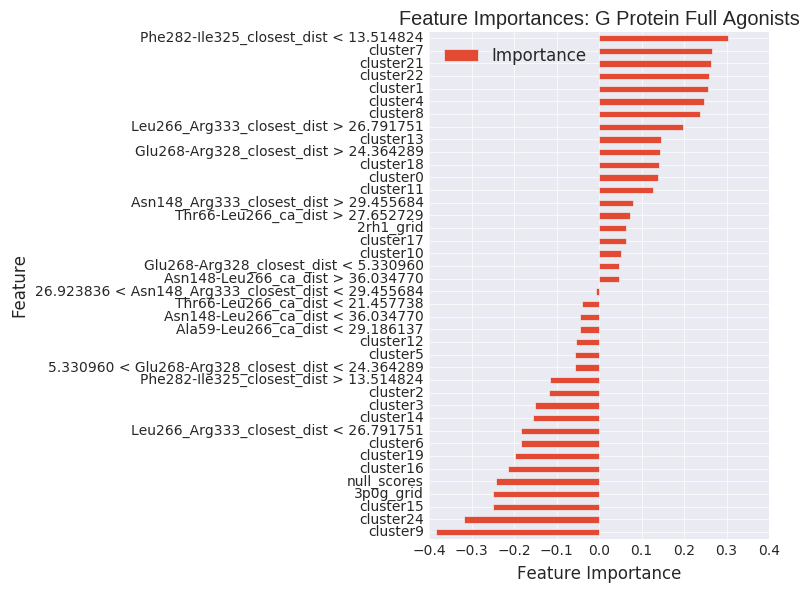

In [112]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
all_feature_names = [null_features.columns.values.tolist(), ddg_scaled.index.values.tolist() + null_features.columns.values.tolist(), all_features_df.columns.values.tolist()]
analyze_multiclass_experiment(gpr_splits_0pt2_0pt8_model_logistic_cv_deer, ["Crystal Structures", "MSM Docking", "MSM Docking with DEER"], all_feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Partial Agonists", "G Protein Full Agonists"], X_scaled, exp_title="G Protein Three Class", coef_name="Logistic Coefficient")



ValueError: list.remove(x): x not in list

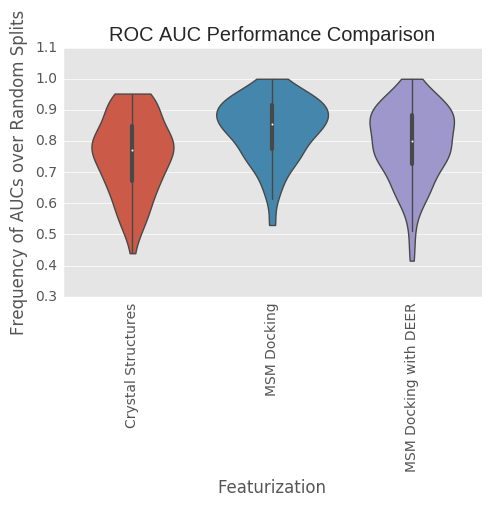

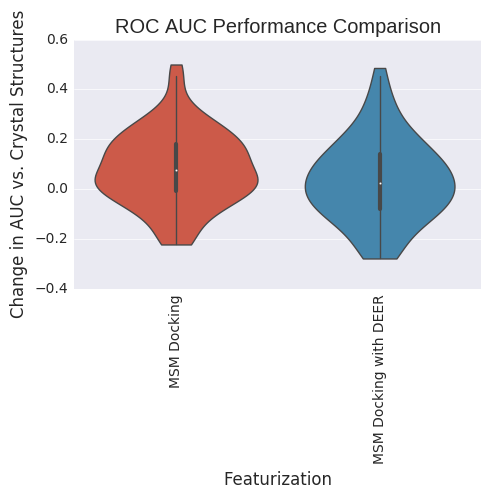

(3, 3)
(3, 3)


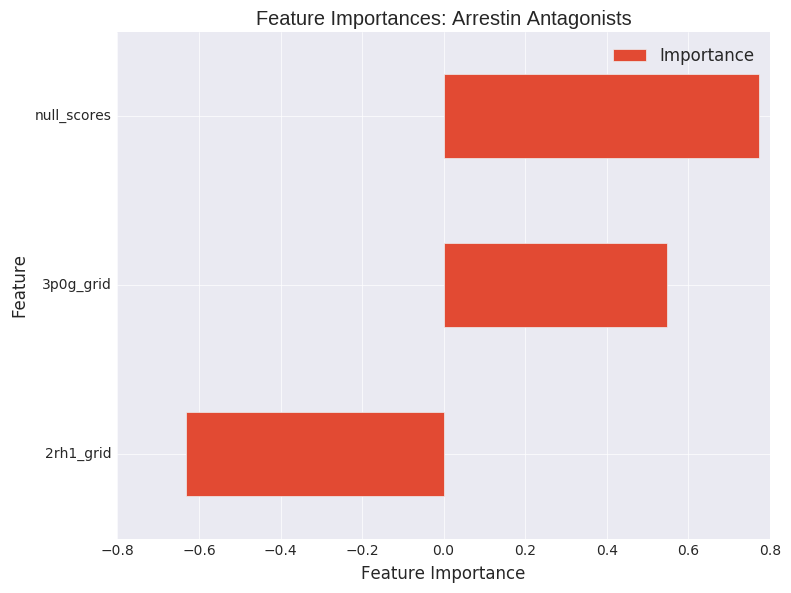

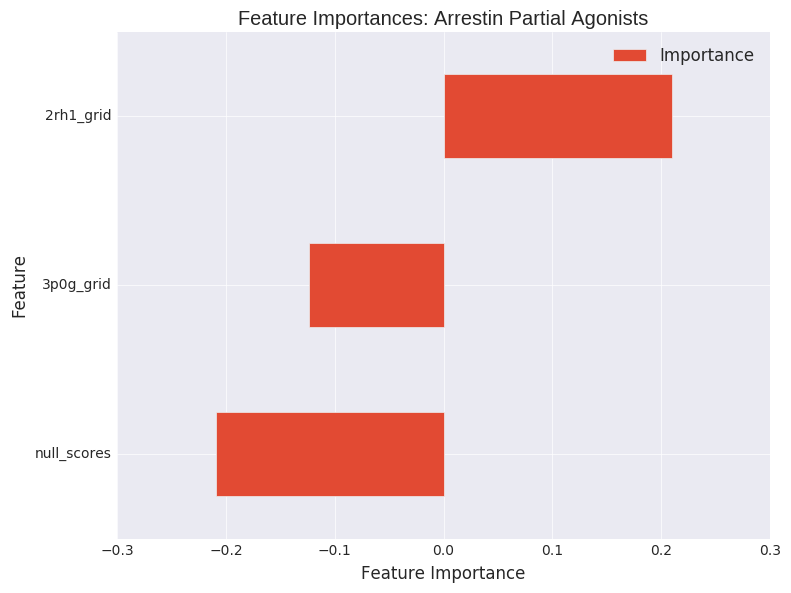

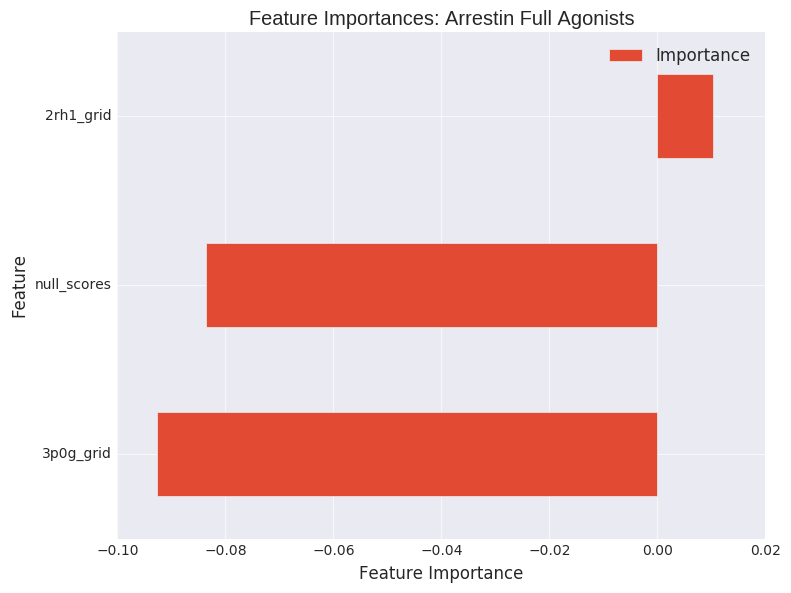

(3, 28)
(3, 28)


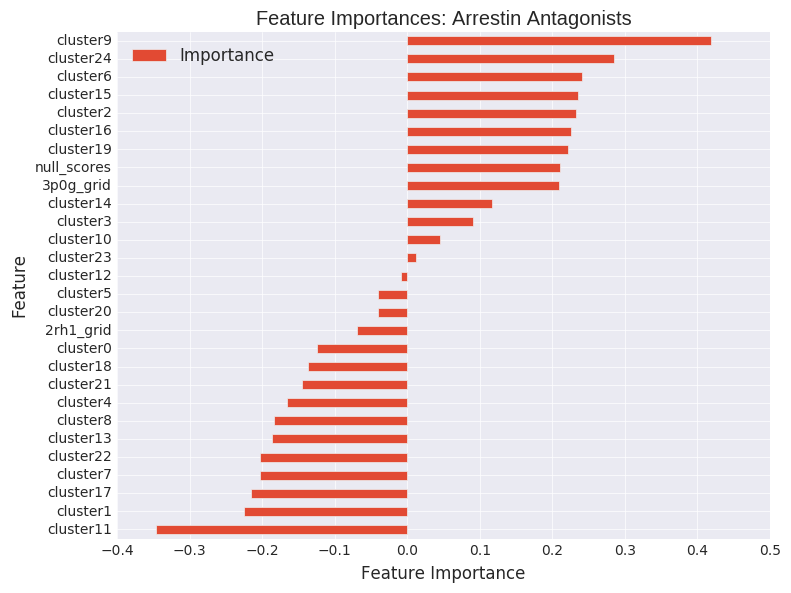

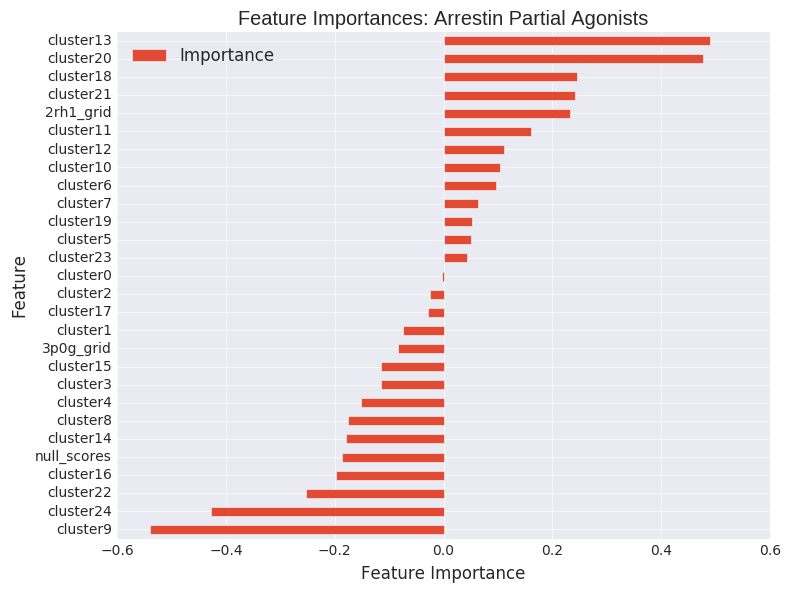

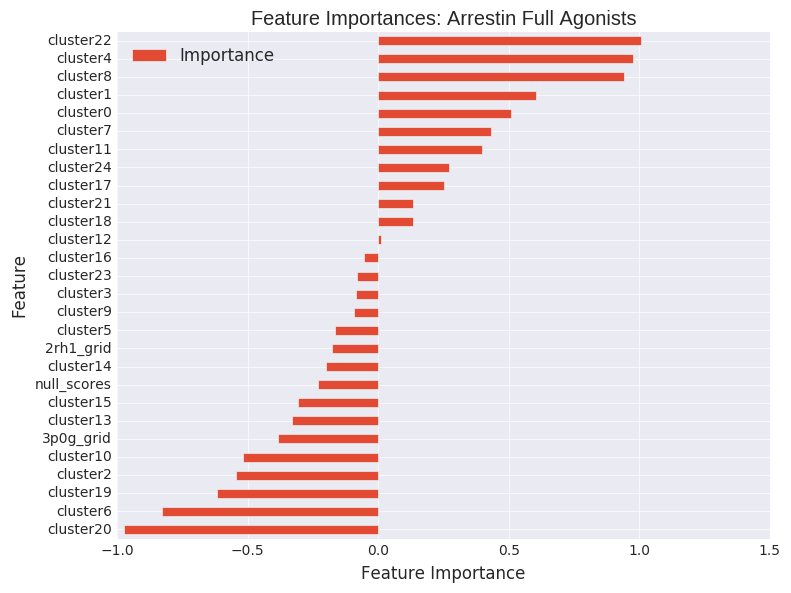

(3, 45)
(3, 45)


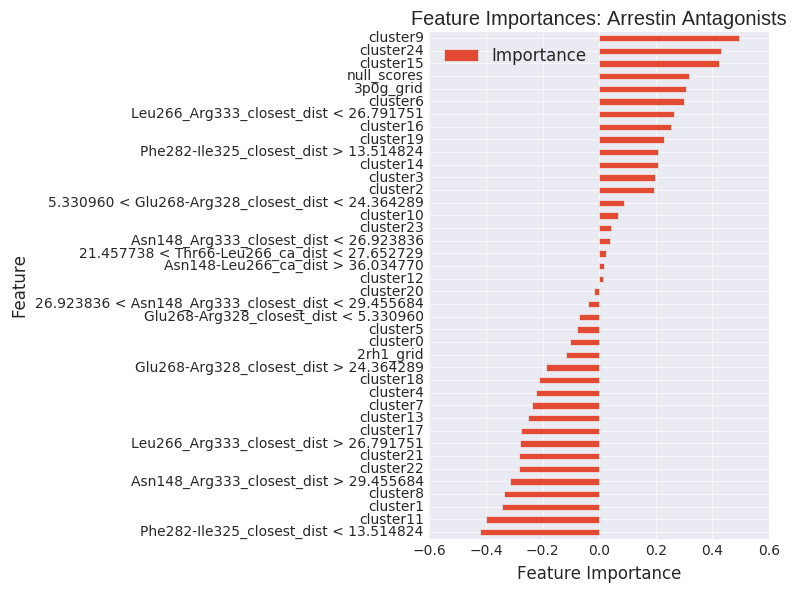

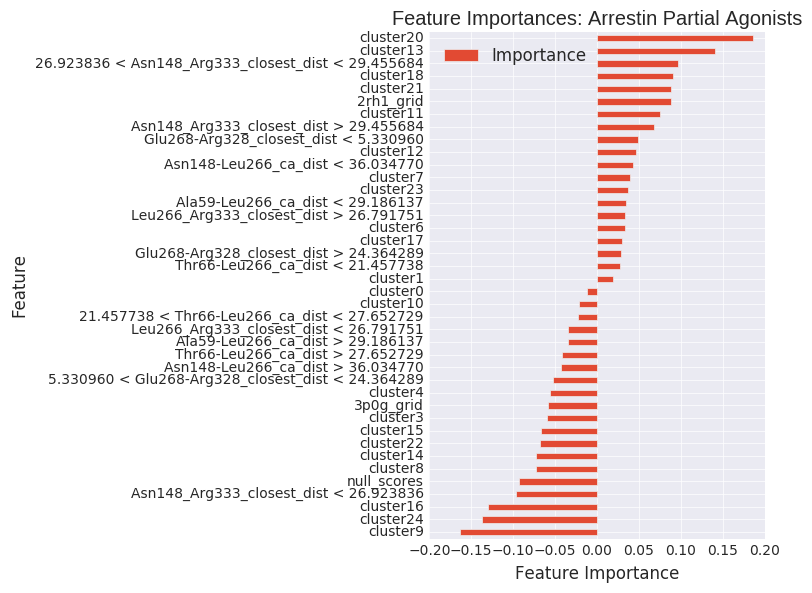

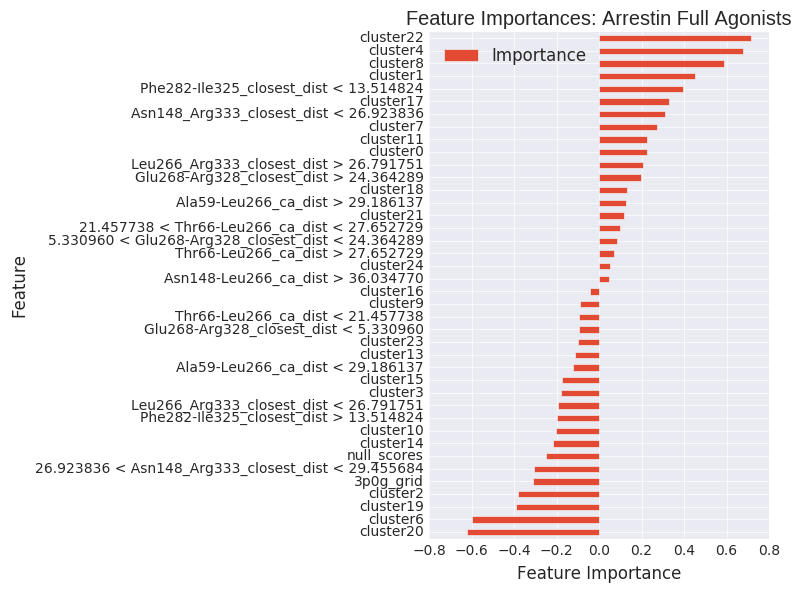

In [113]:
analyze_multiclass_experiment(arr_splits_0pt2_0pt8_model_logistic_cv_deer, ["Crystal Structures", "MSM Docking", "MSM Docking with DEER"], all_feature_names, common_agonists, analysis_dir, ["Arrestin Antagonists", "Arrestin Partial Agonists", "Arrestin Full Agonists"], X_scaled, exp_title="Arrestin Three Class", coef_name="Logistic Coefficient")



In [116]:
np.median(gpr_splits_0pt2_0pt8_model_logistic_cv_deer["test_roc_aucs"], axis=0)

array([ 0.81666667,  0.85634921,  0.86865079])

In [ ]:
np.median(arr_results_t10_multi0pt2_split0pt8_logistic_cv_2f_obs["test_roc_aucs"], axis=0)

In [ ]:
arr_results_t10_multi0pt2_split0pt8_logistic_cv_2f_obs[feature_names[1]][0].predict_proba(features[1])[:,0]

In [ ]:
from scipy.stats import rankdata
plt.scatter(rankdata(arr_results_t10_multi0pt2_split0pt8_logistic_cv_2f_obs[feature_names[1]][0].predict_proba(features[1])[:,1]), y)

In [ ]:
plt.scatter(arr_results_t10_multi0pt2_split0pt8_logistic_cv_2f_obs[feature_names[1]][0].predict_proba(features[1])[:,2], y)
plt.show()

In [ ]:
np.median(np.array(a_vs_g_results_t1000_single0pt2_split0pt8_logistic_cv_2f_obs["test_roc_aucs"]), axis=0)


In [ ]:
arr_results_t100_single0pt2_split0pt9_rfr_2f_obs["feature_importances"][0]

In [ ]:
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
analyze_multiclass_experiment(gprot_results_t100_single0pt2_split0pt9_logistic_cv_2f_obs, 
                              ["Crystal Structures", "MSM Docking"],
                              top_clusters.tolist() + null_features.columns.values.tolist(), common_agonists, analysis_dir,
                              ["GProtein Antagonists", "GProtein Agonists"], X_scaled, 
                              exp_title="GProtein Class", coef_name="Logistic Coefficient")


In [ ]:
all_features_df.columns.shape

In [ ]:
arr_results_t100_single0pt2_split0pt9_rfr_2f_obs["feature_importances"][0][2].shape

In [ ]:
all_features_df.columns.values.tolist()

In [ ]:
print(np.median(np.array(gprot_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print(np.median(np.array(arr_results_t1000_0pt8_ridge["test_r2s"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt33_0pt66_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt5_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print("/n")

print(np.median(np.array(gprot_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))
print(np.median(np.array(arr_results_t1000_single0pt2_split0pt6_logistic_2f["test_roc_aucs"]), axis=0))





In [ ]:
import plots
reload(plots)
from plots import *

import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *


feature_names = top_clusters.tolist() +  ["Inactive Crystal", "Active Crystal", "Crystal Difference"] 
feature_names = [s.replace("cluster", "MSM State ") for s in feature_names]
print(feature_names)

#with open("%s/gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
#    gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = pickle.load(f)
#analyze_multiclass_experiment(gprot_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Partial Agonists", "G Protein Full Agonists"], X_scaled, exp_title="GProtein Three Clas 1000 Trials", coef_name="Logistic Coefficient")


#with open("%s/arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
#    arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f = pickle.load(f)
#analyze_multiclass_experiment(arr_results_t1000_multi0pt2_0pt8_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["Arrestin Antagonists", "Arrestin Partial Agonists", "Arrestin Full Agonists"], X_scaled, exp_title="Arrestin Three Class 1000 Trials", coef_name="Logistic Coefficient")

#plt.clf()
#analyze_multiclass_experiment(gprot_results_t100_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"], feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Agonists"], X_scaled, exp_title="Two Class", coef_name="Logistic Coefficient")
with open("%s/arr_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
    arr_results_t1000_single0pt2_split0pt6_logistic_2f = pickle.load(f)
analyze_multiclass_experiment(arr_results_t1000_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"],feature_names, common_agonists, analysis_dir, ["Arrestin Antagonists", "Arrestin Agonists"], X_scaled, exp_title="Arrestin Two Class", coef_name="Logistic Coefficient")

with open("%s/gprot_results_t1000_single0pt2_split0pt6_logistic_2f.pkl" %analysis_dir, "rb") as f:
    gprot_results_t1000_single0pt2_split0pt6_logistic_2f = pickle.load(f)
analyze_multiclass_experiment(gprot_results_t1000_single0pt2_split0pt6_logistic_2f, ["Crystal Structures", "MSM Docking"],feature_names, common_agonists, analysis_dir, ["G Protein Antagonists", "G Protein Agonists"], X_scaled, exp_title="G Protein Two Class", coef_name="Logistic Coefficient")



In [ ]:
analysis_dir

In [ ]:
X_scaled[:,25]

In [ ]:
ddg_scaled["salbutamol"].sort(inplace=False
                             )

In [ ]:
arr_results_t100_multi_0pt6_logistic = arr_results_t100_multi_0pt_6_rfr 

= arr_results_t1000_multi_0pt_6_rfr 

In [ ]:
save_file = "%s/arr_results_t1000_multi_0pt6_logistic.pkl" %(analysis_dir)
with open(save_file, "wb") as f:
    pickle.dump(arr_results_t1000_multi_0pt6_logistic, f)
    

In [ ]:
save_file = "%s/gprot_results_t1000_multi_0pt6_logistic.pkl" %(analysis_dir)
with open(save_file, "wb") as f:
    pickle.dump(gprot_results_t1000_multi_0pt6_logistic, f)
    

In [ ]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["test_r2s"]), axis=0)

In [ ]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["kendall_pvalues"]), axis=0)

In [ ]:
np.median(np.array(arr_results_t1000_0pt5_md3_ridge["kendall_pvalues"]), axis=0)

In [ ]:
np.median(np.array(arr_results_t1000_multi_0pt6_logistic["test_roc_aucs"]), axis=0)


In [ ]:
plt.hist(y_gpr, bins=50)
plt.show()

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
#y_ori = y_arr - y_gpr
#y_ori = y_arr
y = multi_binarizer(y_arr, [0.33, 0.66])
#y = binarize(y_gpr, threshold=0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled, X_diff]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_results_t100_0pt9_md3 = do_regression_experiment(features, y, feature_names, n_trials, 0.9, regularize=False)

In [ ]:
save_file = "%s/arr_results_t1000_0pt9_md3.pkl" %analysis_dir
with open(save_file, "wb") as f:
    pickle.dump(arr_results_t1000_0pt9_md3, f)

In [ ]:
print(np.median(np.array(arr_results_t1000_0pt9_md3["test_r2s"]), axis=0))

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
#common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
y_ori = y_arr - y_gpr
#y_ori = y_arr
#y = y_arr
y = binarize(y_ori, threshold=-0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
#arr_classification_results_t1000_0pt6 = do_classification_experiment(features, y, feature_names, n_trials, 0.6, regularize=False)
arr_vs_gprot_classification_results_t1000_0pt8 = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_results_1000 = do_regression_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)

In [ ]:
with open("%s/arr_vs_gprot_classification_results_t100_0pt8.pkl" %analysis_dir, "wb") as f:
    pickle.dump(arr_vs_gprot_classification_results_t100_0pt8, f)

In [ ]:
print(np.median(np.array(arr_vs_gprot_classification_results_t100_0pt8["test_aucs"]), axis=0))

In [ ]:
plt.hist(y_ori,bins=50)
plt.show()

In [ ]:

save_file = "%s/arr_classification_results_t1000_0pt6.pkl" %analysis_dir
with open(save_file, "wb") as f:
    pickle.dump(arr_classification_results_t1000_0pt6, f)

In [ ]:
np.median(np.array(arr_classification_results_t1000_0pt6["test_log_aucs"]),axis=0)

In [ ]:
from sklearn.preprocessing import binarize
#arrestin_antagonists = ["s-carvedilol", "nebivolol"]
#non_arrestin_antagonists = [n for n in antagonists if n not in arrestin_antagonists and n not in ["Carvedilol"]]
#y = np.array([1. for i in arrestin_antagonists] + [0. for i in non_arrestin_antagonists]).reshape((-1,1))


total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
#common_agonists = arrestin_antagonists + non_arrestin_antagonists
#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#y = np.array([1. for i in biased_ligands] + [0. for i in non_biased_ligands]).reshape((-1,1))
#common_agonists = biased_ligands + non_biased_ligands

#common_agonists = total_activity.loc[total_activity > 0.2].index.values
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))

top_clusters = delta_delta_g.index.values
#top_clusters = list(set(delta_delta_g.sort("nebivolol").index.values[:10].tolist() + delta_delta_g.sort("3p0g_lig").index.values[:10].tolist()))
#top_clusters = list(set(delta_delta_g.sort("N-Cyclopentylbutanephrine", inplace=False).index.values[:4].tolist() + delta_delta_g.sort("procaterol", inplace=False).index.values[:4].tolist()))
#agonists_df = [a for a in agonists if a in delta_delta_g.columns.values]
#common_agonists = agonists_df + antagonists
#y = np.array([1. for i in agonists_df] + [0. for i in antagonists]).reshape((-1,1))
common_agonists = common_ligands
y_arr = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
y_gpr = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
#y_ori = y_arr - y_gpr
y_ori = y_arr
#y = y_arr
y = binarize(y_arr, threshold=0.2)

C = null_features.loc[common_agonists].values
#X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X = np.hstack([delta_delta_g.loc[top_clusters][common_agonists].values.T, C])
#X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
X_scaled = np.hstack([ddg_scaled.loc[top_clusters][common_agonists].values.T, C])
#D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T
D_scaled = np.hstack([docking_normalized.loc[top_clusters][common_agonists].values.T, C])
X_diff = np.zeros((X.shape[0], X.shape[1]**2/2))
k=0
for i in range(0,X.shape[1]):
    for j in range(i+1,X.shape[1]):
        X_diff[:,k] = X[:,i] - X[:,j]
        k+=1
X_diff = np.hstack([X_scaled, X_diff, C])

features = [C, D_scaled, X, X_scaled, X_diff]
features_y = [C, D_scaled, X, X_scaled]
feature_names = ["Crystal Structures", "Normalized Docking", "Docking ddG", "Docking ddg Scaled", "Docking ddG Differences"]

n_trials = 1000
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = do_classification_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)
#arr_auc_results = do_regression_experiment(features, y, feature_names, n_trials, 0.8, regularize=False)

In [ ]:
np.median(np.array(test_log_aucs),axis=0)

In [ ]:
np.median(np.array(gprot_results["test_r2s"]),axis=0)

In [ ]:
gprot_results["test_r2s"]

In [ ]:
features_y = copy.deepcopy(features)
features_y.append(y)
train_test_arrays = train_test_split(*features_y, train_size=0.8)
print([a.shape for a in train_test_arrays])

In [ ]:
train_test_arrays = train_test_split(*features_y, train_size=0.8)
print([a.shape for a in train_test_arrays])

In [ ]:
gprot_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
#import pickle
gprot_file = "%s/gprot_results_0pt2_XP_no-regularization.pkl"
with open("%s/gprot_results_0pt2_XP_no-regularization.pkl", "wb") as f:
    pickle.dump(gprot_results, f)
with open(gprot_file) as f:
    test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = pickle.load(f)

In [ ]:
#arrestin_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
#import pickle
arrestin_file = "%s/arrestin_results_0pt2_XP_no-regularization.pkl"
#with open("%s/arrestin_results_0pt2_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(arrestin_results, f)
with open(arrestin_file) as f:
    test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = pickle.load(f)

In [ ]:
#arrestin_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
arrestin_rfr_file = "%s/arrestin_results_rfr_XP_no-regularization.pkl"
#with open("%s/arrestin_results_rfr_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(arrestin_rfr_results, f)
with open(arrestin_rfr_file) as f:
    test_r2s, rfr_feature_importances = pickle.load(f)

In [ ]:
#gprot_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
gprot_rfr_file = "%s/gprot_results_rfr_XP_no-regularization.pkl"
#with open("%s/gprot_results_rfr_XP_no-regularization.pkl", "wb") as f:
#    pickle.dump(gprot_rfr_results, f)
with open(gprot_rfr_file) as f:
    test_r2s, rfr_feature_importances = pickle.load(f)

In [ ]:
test_aucs = np.array(test_aucs)
plt.clf()
plt.boxplot(test_aucs[:,2]-test_aucs[:,0])
plt.show()

In [ ]:
test_log_aucs = np.array(test_log_aucs)
np.percentile(test_aucs[:,2]-test_aucs[:,0], 50)

In [ ]:
import sklearn
null_preds = binarize(C[:,2])
sklearn.metrics.roc_auc_score(binarize(y, 0.2).ravel(), null_preds.ravel())

In [ ]:
test_aucs = np.array(test_aucs)
print(np.median(test_aucs, axis=0))
print(np.median(test_aucs[:,2] - test_aucs[:,0]))

In [ ]:
n_successes = len(np.where(test_aucs[:,2]-test_aucs[:,0] > 0.)[0])
nobs = test_aucs.shape[0]
statsmodels.stats.proportion.proportion_confint(count=n_successes, nobs=nobs, alpha=0.01, method='wilson')


In [ ]:
np.median(np.array(test_r2s),axis=0)

In [ ]:
arrestin_vs_gprot_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])
import pickle
with open("%s/arrestin_vs_gprot_results_-0pt2_XP.pkl", "wb") as f:
    pickle.dump(arrestin_vs_gprot_results, f)

In [ ]:
arrestin_vs_gprot_rfr_results = copy.deepcopy([test_r2s, rfr_feature_importances])
import pickle
with open("%s/arrestin_vs_gprot_rfr_results_XP.pkl", "wb") as f:
    pickle.dump(arrestin_vs_gprot_rfr_results, f)

In [ ]:
test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances = arrestin_vs_gprot_results

In [ ]:
#gprotein_results = copy.deepcopy([test_accuracies, test_aucs, test_log_aucs, C_test_aucs, C_test_log_aucs, feature_importances])

In [ ]:
results_dict = gprot_results_t1000_multi_0pt6_logistic
import efficacy_scripts
reload(efficacy_scripts)
from efficacy_scripts import *
importances_df, results_df = analyze_classification_experiment(results_dict["test_roc_aucs"],
                                               results_dict["feature_importances"],
                                               feature_names,
                                               X_scaled, y, pd.concat([ddg_scaled, null_features.transpose()], axis=0),
                                               top_clusters.tolist() + null_features.columns.values.tolist(), 
                                               common_agonists, 
                                                "Predicting G Protein Three Class, 1000 trials, 60:40 Split, XP", analysis_dir)

In [ ]:
feature_names

In [ ]:
importances_df, results_df = analyze_experiment(test_aucs, test_log_aucs, feature_importances, feature_names,
                        X_scaled, y, pd.concat([ddg_scaled, null_features.transpose()], axis=0) , top_clusters.tolist() + null_features.columns.values.tolist(), common_agonists, "Predicting Arrestin, w Crystal Features, 0.2, SP", analysis_dir)

In [ ]:
importances_df, results_df = analyze_regression_experiment(test_r2s, rfr_feature_importances, feature_names,
                        X, y, pd.concat([delta_delta_g, null_features.transpose()], axis=0) , top_clusters.tolist() + null_features.columns.values.tolist(), common_agonists, "Predicting Arrestin, RFR, w Crystal Features, SP", analysis_dir)

In [ ]:
def get_top_measurable_features(samples_normalized_features_avg_df, cluster_name):
    import re
    top_features_cluster = []
    #top_features_cluster = samples_normalized_features_avg_df.loc["cluster_name"].loc[samples_normalized_features_avg_df.loc["cluster_name"].abs() > .75].index.values
    #print(top_features_cluster)
    #print(len(top_features_cluster))
    [top_features_cluster.append(pair) for pair in samples_normalized_features_avg_df.loc[cluster_name].abs().sort(inplace=False, ascending=False).index.values[:10]]
    all_features = []
    features = []
    for f in top_features_cluster:
        fs = f.split(",")
        for i in range(0, len(fs)):
            res = int(re.findall(r'\d+', fs[i])[0])
            all_features.append(res)
            if "TRP" in fs[i] or "CYS" in fs[i] or "TYR" in fs[i] or "LYS" in fs[i]:
                features.append(res)
            
    top_features_cluster = sorted(list(set(features)))
    #print(sorted(list(set([int(re.findall(r'\d+', r)[0]) for r in all_features]))))
    #print(top_features_cluster)
    return top_features_cluster, all_features
a, b = get_top_measurable_features(samples_normalized_features_averages_df, 6)

In [ ]:
print(b)

In [ ]:
ddg_scaled[["norepinephrine", "r_epinephrine", "ethylnorepinephrine", "nebivolol", "s-carvedilol", "s-carazolol"]]

In [ ]:
print(np.mean(test_aucs, axis=0))
print(np.median(test_aucs, axis=0))
print(np.mean(test_log_aucs, axis=0))
print(np.median(test_log_aucs, axis=0))



In [ ]:
plt.scatter(ddg_scaled.loc["cluster2"][common_agonists], y)

In [ ]:
y_ori = bret["B2AR-Gprotein, Mean"].loc[common_agonists].values.reshape((-1,1))
y = binarize(y_ori, threshold=0.05)

X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
C = null_features.loc[common_agonists].values
D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T

X_train = D_scaled
y_train = y
f = np.zeros(X_train.shape[1])

rfr = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1, oob_score=True)
rfr.fit(X_train, y_train)

#top_indices = np.argsort(rfr.feature_importances_*-1.)[:min(20, X_train.shape[1])]
#rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score=True)
#X_train = X_train[:, top_indices]
#rfr.fit(X_train, y_train)
#f[top_indices] = rfr.feature_importances_
#y_pred = rfr.predict(X_train)
#y_score = rfr.predict_proba(X_train)
top_indices=range(0,100)

In [ ]:
top_indices

In [ ]:
X_scaled.shape

In [ ]:
#G Protein, Agonist Results
test_drugs = secret_compounds + ["nebivolol", "s-carvedilol", "xamoterol", "3p0g_lig", "isoetharine", "ethylnorepinephrine", "N-Cyclopentylbutanephrine", "ta-2005", "procaterol"]
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
print(X_test)
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#G Protein, Full Agonist Results
test_drugs = secret_compounds + ["nebivolol", "s-carvedilol", "xamoterol", "3p0g_lig", "isoetharine", "ethylnorepinephrine", "N-Cyclopentylbutanephrine"]
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
common_agonists = total_activity.loc[total_activity > 0.2].index.values
plt.scatter(docking_normalized.loc["cluster21"][common_agonists], bret["B2AR-Gprotein, Mean"].subtract(bret["B2AR-Arrestin, Mean"])[common_agonists])

In [ ]:
len(common_ligands)

In [ ]:
#ARRESTIN, Partial Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
#ARRESTIN, Full Agonist Results
X_test = docking_normalized.transpose().loc[test_drugs].values[:, top_indices]
X_test.shape
pd.DataFrame(rfr.predict_proba(X_test), index=test_drugs, columns=["P(Antagonist", "P(Agonist)"])

In [ ]:
top_indices

In [ ]:
ddg_scaled.transpose().loc[secret_compounds]

In [ ]:
plot_clustermap(docking_normalized[secret_compounds].iloc[top_indices].transpose(), save_file="%s/mehrdad_clustermap.pdf" %(save_dir), method='average', z_score=None)



In [ ]:
np.median(test_aucs, axis=0)

In [ ]:
plt.scatter(ddg_scaled.loc["cluster11"][common_agonists], y)



In [ ]:
arrestin_top = [16, 80, 43, 21, 84, 38, 44, 6, 13, 99]
gprot_top = [44, 6, 83, 4, 76, 99, 62, 92, 39, 80]

arrestin_only = sorted(list(set(arrestin_top).difference(set(gprot_top))))
print(arrestin_only)
gprot_only = sorted(list(set(gprot_top).difference(set(arrestin_top))))
print(gprot_only)
both = sorted(list(set(arrestin_top).intersection(set(gprot_top))))
print(both)


In [ ]:
samples_pnas_tica.loc[importances_df.index.values.tolist()[:5]]

In [ ]:
importances_df

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 10
feature_importances = []
total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
common_agonists = total_activity.loc[total_activity > 0.1].index.values

#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]
#biased_ligands += ["nebivolol", "s-carvedilol"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#non_biased_ligands += ["s-carazolol", "Ici215001", "bisoprolol", "timolol", "s-atenolol"]
#non_biased_ligands = [n for n in df.columns.values.tolist() if n not in biased_ligands and "Carvedilol" not in n]
#common_agonists = biased_ligands + non_biased_ligands
#common_agonists = common_ligands
#top_clusters = ["cluster80", "cluster62", "cluster11", "cluster21", "cluster16", "cluster43", "cluster38"]
#differences = np.zeros((len(top_clusters), len(top_clusters)))
#for i, cluster in enumerate(top_clusters):
#    for j in range(i, len(top_clusters)):
#        differences[i][j] = 

#top_clusters = importances_df.index.values
top_clusters = delta_delta_g.index.values

y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].subtract(bret["B2AR-Gprotein, Mean"].loc[common_agonists]).values.reshape((-1,1))
#y_ori = np.vstack([y_ori, np.ones(3).reshape((-1,1))])
#common_agonists = common_agonists.tolist() + biased_ligands

X = delta_delta_g.loc[top_clusters][common_agonists].values.T
X_scaled = ddg_scaled.loc[top_clusters][common_agonists].values.T
C = null_features.loc[common_agonists].values
D_scaled = docking_normalized.loc[top_clusters][common_agonists].values.T

#y = np.array([1. for n in biased_ligands] + [0. for n in non_biased_ligands]).reshape((-1,1))
#print(y_ori)
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
#plt.hist(y_ori, bins=25)
y = binarize(y_ori, threshold=-0.2)

features = [C, X_scaled, D_scaled]
features_y = [C, X_scaled, D_scaled, y]
feature_names = ["Crystal Structures", "MSM ddG", "Docking"]

In [ ]:
xt = ddg_scaled[biased_ligands].values.T
xt_preds = []


for j in range(0,n_trials):
    print(j)
    aucs = []
    log_aucs = []
    train_test_arrays = sklearn.cross_validation.train_test_split(*features_y, train_size=0.8, stratify=y) 
    y_train = train_test_arrays[2*len(features)]
    y_test = train_test_arrays[2*len(features) + 1]
    feature_importance = []
    
    for i in range(0, len(features)):
        X_train = train_test_arrays[2*i]
        X_test = train_test_arrays[2*i+1]

        sc = StandardScaler()
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)

        rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=3, n_jobs=-1, oob_score=True)
        rfr.fit(X_train, y_train)
        #top_indices = np.argsort(rfr.feature_importances_*-1.)[:min(10, X.shape[1])]
        feature_importance.append(rfr.feature_importances_)
        #rfr = RandomForestClassifier(n_estimators=10, max_features=None, n_jobs=-1, oob_score=True)
        #X_train = X_train[:, top_indices]
        #X_test = X_test[:, top_indices]
        #rfr.fit(X_train, y_train)
        #f = np.zeros(X.shape[1])
        #f[top_indices] = rfr.feature_importances_
        #feature_importance.append(f)
        
        if i == 1:
            xt_preds.append(rfr.predict(xt))
        
        y_pred = rfr.predict(X_test)
        y_score = rfr.predict_proba(X_test)
        auc, logauc = compute_auc(y_test, y_score)
        aucs.append(auc)
        log_aucs.append(logauc)  
    feature_importances.append(feature_importance)
    test_aucs.append(aucs)
    test_log_aucs.append(log_aucs)

In [ ]:
biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine"]

non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]

ddg_scaled.loc[importances_df.index.values[:5]][biased_ligands + non_biased_ligands]

In [ ]:
ddg_scaled.sort("procaterol", inplace=False).iloc[:10]

In [ ]:
plt.scatter(ddg_scaled.loc["cluster36"][common_agonists], y)

In [ ]:
y

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 1000
feature_importances = []
reg = []
total_activity = bret["B2AR-Arrestin, Mean"].loc[common_ligands].add(bret["B2AR-Gprotein, Mean"].loc[common_ligands])
common_agonists = total_activity.loc[total_activity > 0.3].index.values

#biased_ligands = ["ethylnorepinephrine", "isoetharine", "N-Cyclopentylbutanephrine", "3p0g_lig"]
#biased_ligands = ["nebivolol", "s-carvedilol"]
#non_biased_ligands =  ["r_isopreterenol", "r_epinephrine", "norepinephrine", "zinterol", "orciprenaline", "epinine", "terbutaline", "fenoterol", "procaterol", "formoterol", "salbutamol", "salmeterol"]
#non_biased_ligands = ["s-carazolol", "Ici215001", "bisoprolol", "timolol", "s-atenolol"]
#non_biased_ligands = [n for n in df.columns.values.tolist() if n not in biased_ligands and "Carvedilol" not in n]
#common_agonists = biased_ligands + non_biased_ligands

X = delta_delta_g[common_agonists].values.T
X_scaled = ddg_scaled[common_agonists].values.T
C = null_features.loc[common_agonists].values

#y = np.array([1. for n in biased_ligands] + [0. for n in non_biased_ligands]).reshape((-1,1))
#y_ori = bret["B2AR-Arrestin, Mean"].loc[common_ligands].divide(bret["B2AR-Arrestin, Mean"].loc[common_agonists].add(bret["B2AR-Gprotein, Mean"].loc[common_agonists])).values.reshape((-1,1))
y_ori = bret["B2AR-Arrestin, Mean"].loc[common_agonists].values.reshape((-1,1))
plt.hist(y_ori, bins=25)
y = binarize(y_ori, threshold=0.2) 

features = [C, X, X_scaled, docking_normalized[common_agonists].values.T]
features_y = [C, X, X_scaled, docking_normalized[common_agonists].values.T, y]
feature_names = ["Crystal Structures", "MSM States", "Normalized MSM States", "Normalized Docking"]
  

for j in range(0,n_trials):
    print(j)
    aucs = []
    log_aucs = []
    train_test_arrays = sklearn.cross_validation.train_test_split(*features_y, train_size=0.8, stratify=y) 
    y_train = train_test_arrays[2*len(features)]
    y_test = train_test_arrays[2*len(features) + 1]
    feature_importance = []
    r = []
    
    for i in range(0, len(features)):
        X_train = train_test_arrays[2*i]
        X_test = train_test_arrays[2*i+1]

        sc = StandardScaler()
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)
        
        cs = np.logspace(-3., 20.)
        rfr = LogisticRegressionCV(Cs=cs, penalty='l2')
        rfr.fit(X_train, y_train)
        feature_importance.append(rfr.coef_)
        y_pred = rfr.predict(X_test)
        y_score = rfr.predict_proba(X_test)
        auc, logauc = compute_auc(y_test, y_score)
        aucs.append(auc)
        log_aucs.append(logauc)  
        r.append(rfr.C_)
    reg.append(r)
    feature_importances.append(feature_importance)
    test_aucs.append(aucs)
    test_log_aucs.append(log_aucs)

In [ ]:
plt.scatter(docking_normalized.loc["cluster80"][common_ligands], -1.0*bret.loc[common_ligands]["B2AR-Gprotein, Mean"].subtract(bret.loc[common_ligands]["B2AR-Arrestin, Mean"]))

In [ ]:
auc_df = pd.DataFrame(np.array(test_aucs), columns=feature_names)
auc_df.plot(kind='box')

In [ ]:
auc_df.median(axis=0)

In [ ]:
normalized_docking_importances = [f[1] for f in feature_importances]

In [ ]:
importances_df = make_importances_df(normalized_docking_importances, top_clusters)
importances_df


In [ ]:
from sklearn.preprocessing import binarize
X = ddg_scaled[common_ligands].values.T
y = bret["B2AR-Gprotein, Mean"].loc[common_ligands].values.reshape((-1,1))
y = binarize(y, threshold=0.5)
print(np.shape(y))
from sklearn.svm import l1_min_c
from sklearn import linear_model

#cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)
cs = np.logspace(-3., 20.)
print("Computing regularization path ...")
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = pd.DataFrame(np.array(coefs_), columns=ddg_scaled.index.values, index=np.log10(cs))
#coefs_[list(set(inactive_clusters.tolist()).intersection(set(importances_df.iloc[10:20].index.values.tolist())))].plot()
coefs_[importances_df.index.values[:5]].plot()
#plt.plot(np.log10(cs), coefs_)
#ymin, ymax = plt.ylim()
###plt.xlabel('log(C)')
#plt.ylabel('Coefficients')
##plt.title('Logistic Regression Path')
#plt.axis('tight')
#plt.show()

In [ ]:
samples_pnas_tica.loc[importances_df.index.values[:10]]

In [ ]:
plt.scatter(deltas_tica.loc[importances_df.index.values[:10]]["tIC.6"], coefs_[importances_df.index.values[:10]].values[49])

In [ ]:
plot_clustermap(ddg_scaled[common_agonists.tolist()].loc[importances_df.index.values.tolist()[:5]].transpose(), save_file="%s/msm_n-clusters%d_lag-time%d_tICs%d.pdf" %(tica_dir, n_clusters, msm_lag_time, n_components), method='average')



In [ ]:
samples_pnas_tica.loc[samples_pnas_tica["tm6_tm3_dist"] < 18.0].loc[importances_df.iloc[0:5].index].dropna()

In [ ]:
ddg_scaled["nebivolol"].subtract(ddg_scaled["s-carazolol"]).sort(inplace=False).iloc[:10]

In [ ]:
ddg_scaled["s-carvedilol"].subtract(ddg_scaled["s-carazolol"]).sort(inplace=False).iloc[:10]

In [ ]:
samples_pnas_tica.loc[["cluster74", "cluster69", "cluster13", "cluster12", "cluster66"]]

In [ ]:
import plots
reload(plots)
from plots import *
#plot_importances_barh(importances_df.values, importances_df.index.values, "MSM State Importance in Arrestin Prediction", "Feature Importance", "MSM State", "%s/arrestin_0pt5_classification_rfr.pdf" %(tica_dir), n_features=50)
importances_df.iloc[0:25].plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("MSM State")
plt.title("Importance of MSM States in Predicting Arrestin Activity")
plt.savefig("%s/msm_%dstates_arrestin_0pt2_agonists_only_classification_rfr.pdf" %(tica_dir, n_clusters))
#plt.clf()


In [ ]:
X = docking_normalized[common_agonists].values.T
y = bret["B2AR-Arrestin, Mean"].subtract(bret["B2AR-Gprotein, Mean"]).loc[common_agonists].values.reshape((-1,1))
y = binarize(y, threshold=-0.2)
print(y)
from sklearn import linear_model

cs = np.logspace(-3., 200.)
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = pd.DataFrame(np.array(coefs_), columns=ddg_scaled.index.values, index=np.log10(cs))
coefs_[importances_df.iloc[0:10].loc[samples_pnas_tica["tm6_tm3_dist"] < 9.].index].plot()
plt.xlabel("Log Regularization Parameter")
plt.ylabel("Coefficient for Arrestin Activity")
plt.title("Logistic Regression Coefficient in Predicting Arrestin Activity")
plt.savefig("%s/msm_%dstates_arrestin_0pt2_agonists_only_classification_logistic.pdf" %(tica_dir, n_clusters))
#plt.clf()

In [ ]:
np.shape(coefs_)

In [ ]:
print(np.median(np.nan_to_num(test_aucs)))
print(np.median(np.nan_to_num(C_test_aucs)))
print(np.median(np.nan_to_num(test_log_aucs)))
print(np.median(np.nan_to_num(C_test_log_aucs)))

In [ ]:
lr = LinearRegression()
states = importances_df.index.values.tolist()
model = lr.fit(X, y_ori)
pd.DataFrame(model.coef_.T, index=delta_delta_g.index, columns=["importance"]).loc[states]#.sort("importance", inplace=False)

In [ ]:
model.coef_.shape

In [ ]:
import seaborn
reload(seaborn)
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
g = (auc_df
    .pipe((sns.boxplot, 'data'), orient='v', showfliers=True))
g.set_xticklabels(auc_df.columns.values, rotation=90)
sns.despine()
plt.title("AUC for Arrestin Prediction")
plt.ylabel("Frequency AUCs over Random Splits")
plt.xlabel("Featurization")
plt.show()
plt.savefig("%s/auc_arrestin_prediction_all_ligands_0pt2_cutoff.pdf" %tica_dir)

In [ ]:
corr_matrix = compute_pearson_matrix(delta_delta_g[common_agonists].values.T, y)
corr_df = pd.DataFrame(model.coef_.T, index=delta_delta_g.index.values, columns=["Correlation"]).sort("Correlation",inplace=False)
#corr_df.loc[["cluster80", "cluster16", "cluster43", "cluster44"]].plot(kind='barh')
corr_df.loc[importances_df.index.values[:20]].sort("Correlation", inplace=False).plot(kind='barh')#, figsize=(5,20))
plt.xlabel("Pearsson Correlation with Arrestin Activity")
plt.ylabel("MSM State")
plt.title("Correlation of MSM States with Arrestin Activity")


In [ ]:
samples_pnas_tica.loc[corr_df.loc[importances_df.index.values[:20]].sort("Correlation", inplace=False).index.values]

In [ ]:
df = copy.deepcopy(aggregate_docking_msm)
df[df.columns.values] = scale(df.values)
plt.scatter(df[common_ligands].loc["cluster13"].values, bret["B2AR-Arrestin, Mean"].loc[common_ligands].values.T)

In [ ]:
bret

In [ ]:
import sklearn
reload(sklearn)
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import binarize
from sklearn import cross_validation

test_accuracies = []
test_aucs = []
test_log_aucs = []
C_test_aucs = []
C_test_log_aucs = []
n_trials = 100
feature_importances = []

for j in range(0,n_trials):
    print(j)

    X = delta_delta_g[common_ligands].values.T
    C = null_features.loc[common_ligands].values
    y = bret["B2AR-Arrestin, Mean"].loc[common_ligands].values.reshape((-1,1))
    y = binarize(y, threshold=0.5)

    X_train, X_test, y_train, y_test, C_train, C_test = sklearn.cross_validation.train_test_split(X, y, C, train_size=0.8, stratify=y)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    sc = StandardScaler()
    sc.fit(C_train)
    C_train = sc.transform(C_train)
    C_test = sc.transform(C_test)
 
    rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=2, n_jobs=-1, oob_score=True)
    rfr.fit(X_train, y_train)
    feature_importances.append(rfr.feature_importances_)
    y_pred = rfr.predict(X_test)
    test_accuracies.append(np.sqrt(np.mean(np.square(y_test-y_pred.reshape((-1,1))))))
    y_score = rfr.predict_proba(X_test)
    auc, logauc = compute_auc(y_test, y_score)
    test_aucs.append(auc)
    test_log_aucs.append(logauc)
    
    rfr = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=2, n_jobs=-1, oob_score=True)
    rfr.fit(C_train, y_train)
    C_y_pred = rfr.predict(C_test)
    y_score = rfr.predict_proba(C_test)
    auc, logauc = compute_auc(y_test, y_score)
    C_test_aucs.append(auc)
    C_test_log_aucs.append(logauc)

    
    

    

In [ ]:
import seaborn
reload(seaborn)
import seaborn as sns
auc_df = pd.DataFrame(np.vstack([test_aucs, C_test_aucs]).T, columns=["MSM States", "Crystal Structures"])

plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
g = (auc_df
    .pipe((sns.boxplot, 'data'), orient='v', showfliers=True))
#g.set_xticklabels(experiments.columns.values, rotation=90)
sns.despine()
plt.title("AUC for G Protein Prediction")
plt.ylabel("Frequency AUCs over Random Splits")
plt.xlabel("Featurization")
plt.show()
plt.savefig("%s/msm_n-states%d_auc_gprot_prediction_cutoff0pt5.pdf" %(tica_dir, n_clusters))

In [ ]:
importances_df = make_importances_df(feature_importances, delta_delta_g.index.values.tolist())
importances_df



In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
model = Lasso(alpha=0.0001)                                
model.fit(ddg_scaled[common_agonists].values.T, bret.loc[common_agonists]["B2AR-Arrestin, Mean"].subtract(bret.loc[common_agonists]["B2AR-Gprotein, Mean"].values))
pd.DataFrame(model.coef_, index=ddg_scaled.index, columns=["importance"]).sort("importance", inplace=False)

In [ ]:
print(np.median(np.nan_to_num(test_aucs)))
print(np.median(np.nan_to_num(C_test_aucs)))
print(np.median(np.nan_to_num(test_log_aucs)))
print(np.median(np.nan_to_num(C_test_log_aucs)))

In [ ]:
import plots
reload(plots)
from plots import *
#plot_importances_barh(importances_df.values, importances_df.index.values, "MSM State Importance in Arrestin Prediction", "Feature Importance", "MSM State", "%s/arrestin_0pt5_classification_rfr.pdf" %(tica_dir), n_features=50)
importances_df.iloc[0:25].plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("MSM State")
plt.title("Importance of MSM States in Predicting G Protein Activity")
#plt.savefig("%s/msm_%dstates_gprot_0pt5_classification_rfr.pdf" %(tica_dir, n_clusters))
#plt.clf()



In [ ]:
corr_matrix = compute_pearson_matrix(ddg_scaled[common_ligands].values.T, y)
corr_df = pd.DataFrame(model.coef_, index=ddg_scaled.index.values, columns=["Correlation"])
corr_df.loc[importances_df.index.values[:10]].sort("Correlation", inplace=False).plot(kind='barh')
plt.xlabel("Pearsson Correlation with G Protein Activity")
plt.ylabel("MSM State")
plt.title("Correlation of MSM States with G Protein Activity")
#plt.savefig("%s/msm_%dstates_gprot_0pt5_classification_correlations.pdf" %(tica_dir, n_clusters))
#plt.clf()




In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)